# Анализ столкновений птиц с самолетами

__Цель__ - проанализировать данные, выявить закономерности, а также факторы, которые оказывают влияние на столкновения птиц с воздушными судами. Особенное внимание уделить исследованию влияния погодных условий на столкновения. Подготовить данные для отправки их коллегам DS для построения модели предсказания.

__Задачи__:
1.	Предобработать данные, определить типы данных в таблице. 
2.	Обработать данные о погоде (WND, CIG, VIS, TMP, DEW, SLP), преобразовать их в отдельные столбцы. 
3.	Провести исследовательский анализ данных (EDA)
4.	Выявить интересные закономерности в данных, определить, влияет ли погода на столкновения птиц с самолетами. Проверить гипотезы.

## Описание данных

[data_DE_strikes_and_weather.csv](https://docs.yandex.ru/docs/view?url=ya-disk-public%3A%2F%2FyKklYesmmCsdcTRYDTPOBXWERozUGgIe9tSkfAD2J5LP40ZTeWk7XGtK1O2fYcQ9q%2FJ6bpmRyOJonT3VoXnDag%3D%3D%3A%2F2_%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%BE%D1%82%20%D0%A0%D0%B0%D1%88%D0%B8%D1%82%D0%B0%2Fdata_DE_strikes_and_weather.csv&name=data_DE_strikes_and_weather.csv) - объединенный датасет столкновений и погоды

[flights_data_DE.csv](https://docs.yandex.ru/docs/view?url=ya-disk-public%3A%2F%2FyKklYesmmCsdcTRYDTPOBXWERozUGgIe9tSkfAD2J5LP40ZTeWk7XGtK1O2fYcQ9q%2FJ6bpmRyOJonT3VoXnDag%3D%3D%3A%2F2_%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%BE%D1%82%20%D0%A0%D0%B0%D1%88%D0%B8%D1%82%D0%B0%2Fflights_data_DE.csv&name=flights_data_DE.csv) - датасет с рейсами для топ-22 аэропортов по числу столкновений)

__Датасет data_DE_strikes_and_weather.csv___

Данный датасет получен объединением данных о столкновениях с животными воздушных судов от FAA (Federal Aviation Administration) https://www.faa.gov/ и данных о погоде от NCEI (National Centers for Environmental Information) https://www.ncei.noaa.gov/. Данные о погоде брались с ближайшей к аэропорту станции, разница составляет не более 1 часа. Данные о погоде не подгружались, если не указаны координаты и/или время столкновения. Записи страйков с 01/01/2018 по 30/08/2023. Если не указано время, то данные за 12:00

Краткое описание столбцов датасета data_DE_strikes_and_weather.csv (__данные от FAA__):

`Column1` - Столбец индекса строки\
`INDEX_NR` - Индивидуальный номер записи\
`INCIDENT_DATE` - Дата инцидента\
`INCIDENT_MONTH` - Месяц инцидента\
`INCIDENT_YEAR` - Год инцидента\
`TIME` - Время (час и минута) по местному времени\
`TIME_OF_DAY` - Время суток\
`AIRPORT_ID` - Идентификатор аэропорта по международной организации гражданской авиации\
`AIRPORT` - Название аэропорта\
`LATITUDE_x` - Широта аэропорта\
`LONGITUDE_x` - Долгота аэропорта\
`RUNWAY` - Взлетно-посадочная полоса\
`STATE` - Штат\
`FAAREGION` - Регион FAA, где расположен аэропорт\
`LOCATION` - Информация о местоположении\
`OPID` - Код оператора авиакомпании\
`OPERATOR` - Трехбуквенный код оператора судна по международной организации гражданской авиации\
`REG` - Регистрация воздушного судна\
`FLT` - Номер рейса\
`AIRCRAFT` - Воздушное судно\
`AMA` - Код производителя воздушного судна по международной организации гражданской авиации\
`AMO` - Код модели воздушного судна по международной организации гражданской авиации\
`EMA` - Код производителя двигателя\
`EMO` - Код модели двигателя\
`AC_CLASS` - Тип воздушного судна\
`AC_MASS` - Масса воздушного судна\
`TYPE_ENG` - Тип двигателя\
`NUM_ENGS` - Количество двигателей\
`ENG_1_POS` - Расположение двигателя №1 на воздушном судне\
`ENG_2_POS` - Расположение двигателя №2 на воздушном судне\
`ENG_3_POS` - Расположение двигателя №3 на воздушном судне\
`ENG_4_POS` - Расположение двигателя №4 на воздушном судне\
`PHASE_OF_FLIGHT` - Фаза полета во время инцидента\
`HEIGHT` - Высота над уровнем земли в футах\
`SPEED` - Скорость в узлах\
`DISTANCE` - Расстояние в морских милях от аэропорта\
`SKY` - Тип облачного покрова, если есть\
`PRECIPITATION` - Осадки\
`AOS` - Время, в течение которого воздушное судно находилось вне эксплуатации, в часах\
`COST_REPAIRS` - Оценочная стоимость ремонта или замены в долларах США\
`COST_OTHER` - Другие оценочные затраты в долларах США\
`COST_REPAIRS_INFL_ADJ` - Стоимость ремонта, скорректированная на инфляцию\
`COST_OTHER_INFL_ADJ` - Другие затраты, скорректированные на инфляцию\
`INGESTED_OTHER` - Животные, попавшие в другие части воздушного судна, кроме двигателей\
`INDICATED_DAMAGE` - Указывает, было ли повреждение воздушного судна\
`DAMAGE_LEVEL` - Уровень повреждения\
`STR_RAD` - Столкновение с радомом\
`DAM_RAD` - Повреждение радома\
`STR_WINDSHLD` - Столкновение с лобовым стеклом\
`DAM_WINDSHLD` - Повреждение лобового стекла\
`STR_NOSE` - Столкновение с носовой частью\
`DAM_NOSE` - Повреждение носовой части\
`STR_ENG1` - Столкновение с двигателем №1\
`DAM_ENG1` - Повреждение двигателя №1\
`ING_ENG1` - Попадание в двигатель №1\
`STR_ENG2` - Столкновение с двигателем №2\
`DAM_ENG2` - Повреждение двигателя №2\
`ING_ENG2` - Попадание в двигатель №2\
`STR_ENG3` - Столкновение с двигателем №3\
`DAM_ENG3` - Повреждение двигателя №3\
`ING_ENG3` - Попадание в двигатель №3\
`STR_ENG4` - Столкновение с двигателем №4\
`DAM_ENG4` - Повреждение двигателя №4\
`ING_ENG4` - Попадание в двигатель №4\
`STR_PROP` - Столкновение с пропеллером\
`DAM_PROP` - Повреждение пропеллера\
`STR_WING_ROT` - Столкновение с крылом или ротором\
`DAM_WING_ROT` - Повреждение крыла или ротора\
`STR_FUSE` - Столкновение с фюзеляжем\
`DAM_FUSE` - Повреждение фюзеляжа\
`STR_LG` - Столкновение с шасси\
`DAM_LG` - Повреждение шасси\
`STR_TAIL` - Столкновение с хвостовой частью\
`DAM_TAIL` - Повреждение хвостовой части\
`STR_LGHTS` - Столкновение со светильниками\
`DAM_LGHTS` - Повреждение светильников\
`STR_OTHER` - Столкновение с другими частями\
`DAM_OTHER` - Повреждение других частей\
`OTHER_SPECIFY` - Какая часть была повреждена, кроме указанных выше\
`EFFECT` - Влияние на полет\
`EFFECT_OTHER` - Другие влияния на полет\
`BIRD_BAND_NUMBER` - Номер кольца птицы, связанный с животным\
`SPECIES_ID` - Код типа птицы или другого животного по международной организации гражданской авиации\
`SPECIES` - Общее название птицы или другого животного\
`REMARKS` - Замечания\
`REMAINS_COLLECTED` - Указывает, были ли найдены и собраны остатки птицы или дикой природы\
`REMAINS_SENT` - Указывает, были ли отправлены остатки в Смитсоновский институт для идентификации\
`WARNED` - Предупрежден ли пилот о птицах/дикой природе\
`NUM_SEEN` - Количество птиц/дикой природы, увиденных пилотом\
`NUM_STRUCK` - Количество птиц/дикой природы, с которыми произошло столкновение\
`SIZE` - Размер птицы\
`ENROUTE_STATE` - Если столкновение не произошло на подходе, взлете, посадке или таксировке, воздушное судно было в пути. Это показывает местоположение\
`NR_INJURIES` - Количество пострадавших\
`NR_FATALITIES` - Количество смертельных случаев\
`COMMENTS` - Комментарии\
`REPORTED_NAME` - Имя (имена) лица (лиц), составившего отчет\
`REPORTED_TITLE` - Звание (звания) лица (лиц), составившего отчет\
`SOURCE_x` - Тип отчета\
`PERSON` - Кто заполнял отчет\
`LUPDATE` - Последнее время обновления записи\
`TRANSFER` - Неиспользуемое поле на данный момент\


__Столбцы данных о параметрах погоды от NCEI:__

`Unnamed: 0` - Столбец индекса строки\
`ID` - ID метеостанции\
`STATION` - Позывной метеостанции\
`DATE` - Дата и время\
`SOURCE_y` - Код источника данных\
`LATITUDE_y` - Широта метеостанции\
`LONGITUDE_y` - Долгота метеостанции\
`ELEVATION` - Высота метеостанции над уровнем моря\
`NAME` - Название метеостанции\
`REPORT_TYPE` - Тип отчета\
`CALL_SIGN` - Идентификатор аэропорта по международной организации гражданской авиации\
`QUALITY_CONTROL` - Код контроля качества\
`WND` - параметры ветра\
`CIG` - параметры нижней границы облаков\
`VIS` - параметры видимости\
`TMP` - параметры температуры\
`DEW` - параметры точки росы\
`SLP` - параметры давления\


__Датасет flights_data_DE.csv__

Датасет представляет из себя агрегированные данные с рейсами для первых 22 аэропортов по количеству столкновений с животными. Данные получены от BTS (Bureau of Transportation Statistics) https://www.bts.go

`Year` - год (столбец агрегации)\
`Month` - месяц (столбец агрегации)\
`DOMESTIC` - число внутренних рейсов\
`INTERNATIONAL` - число международных рейсов\
`TOTAL` - всего рейсов (сумма столбцов DOMESTIC и INTERNATIONAL)\
`airport` - идентификатор аэропорта международной организации гражданской авиации (столбец агрегации)\
`direction` - направление: Origin - вылет, Destination - прилет

### Загрузка и обзор данных

In [1]:
# импорт библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# загрузка данных
try:
    df = pd.read_csv('C:/Users/Asus/Analytics/data/data_DE_strikes_and_weather.csv', low_memory=False)
except FileNotFoundError:
    print('Please, specify path to data_DE_strikes_and_weather.csv file')
    
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(5)

Column1  INDEX_NR            INCIDENT_DATE  INCIDENT_MONTH  INCIDENT_YEAR  \
0        0    802071  2018-01-06 00:00:00.000               1           2018   
1        1    802074  2018-01-22 00:00:00.000               1           2018   
2        2    802081  2018-01-09 00:00:00.000               1           2018   
3        3    802082  2018-01-10 00:00:00.000               1           2018   
4        4    802083  2018-01-18 00:00:00.000               1           2018   

    TIME TIME_OF_DAY AIRPORT_ID                                     AIRPORT  \
0    NaN         NaN       KDFW                 DALLAS/FORT WORTH INTL ARPT   
1    NaN         NaN       KIAH  GEORGE BUSH INTERCONTINENTAL/ HOUSTON ARPT   
2  12:57         Day       KTEB                           TETERBORO AIRPORT   
3    NaN         NaN       KPGD                            PUNTA GORDA ARPT   
4    NaN         NaN       KCLT                 CHARLOTTE/DOUGLAS INTL ARPT   

   LATITUDE_x  LONGITUDE_x  RUNWAY STATE FAAREGION LOCATION OPID   OPERATOR  \
0    32.89595    -97.03720     17C    TX      ASW       NaN  ENY  ENVOY AIR   
1    29.98047    -95.33972  TWY EE    TX      ASW       NaN  UNK    UNKNOWN   
2    40.85010    -74.06084      24    NJ      AEA       NaN  BUS   BUSINESS   
3    26.92019    -81.99053       4    FL      ASO       NaN  UNK    UNKNOWN   
4    35.21401    -80.94313     36R    NC      ASO       NaN  UNK    UNKNOWN   

      REG   FLT            AIRCRAFT  AMA  AMO   EMA  EMO AC_CLASS  AC_MASS  \
0  N234JW  3631             EMB-170  332  NaN  22.0  4.0      A        4.0   
1     NaN   NaN             UNKNOWN  NaN  NaN   NaN  NaN      NaN      NaN   
2  N679MS   972  EMB-500 PHENOM 100  332  NaN  31.0  NaN      A        2.0   
3     NaN   NaN             UNKNOWN  NaN  NaN   NaN  NaN      NaN      NaN   
4     NaN   NaN             UNKNOWN  NaN  NaN   NaN  NaN      NaN      NaN   

  TYPE_ENG  NUM_ENGS  ENG_1_POS  ENG_2_POS  ENG_3_POS  ENG_4_POS  \
0        D       2.0        1.0        1.0        NaN        NaN   
1      NaN       NaN        NaN        NaN        NaN        NaN   
2        D       2.0        5.0        5.0        NaN        NaN   
3      NaN       NaN        NaN        NaN        NaN        NaN   
4      NaN       NaN        NaN        NaN        NaN        NaN   

  PHASE_OF_FLIGHT  HEIGHT  SPEED  DISTANCE         SKY PRECIPITATION  AOS  \
0        Approach   300.0  133.0       NaN    No Cloud           NaN  1.0   
1             NaN     NaN    NaN       0.0         NaN           NaN  NaN   
2        Approach     NaN    NaN       2.0  Some Cloud           NaN  NaN   
3             NaN     NaN    NaN       0.0         NaN           NaN  NaN   
4             NaN     NaN    NaN       0.0         NaN           NaN  NaN   

   COST_REPAIRS  COST_OTHER  COST_REPAIRS_INFL_ADJ  COST_OTHER_INFL_ADJ  \
0           NaN       100.0                    NaN                117.0   
1           NaN         NaN                    NaN                  NaN   
2           NaN         NaN                    NaN                  NaN   
3           NaN         NaN                    NaN                  NaN   
4           NaN         NaN                    NaN                  NaN   

   INGESTED_OTHER  INDICATED_DAMAGE DAMAGE_LEVEL  STR_RAD  DAM_RAD  \
0           False             False            N    False    False   
1           False             False          NaN    False    False   
2           False             False            N    False    False   
3           False             False          NaN    False    False   
4           False             False          NaN    False    False   

   STR_WINDSHLD  DAM_WINDSHLD  STR_NOSE  DAM_NOSE  STR_ENG1  DAM_ENG1  \
0         False         False      True     False     False     False   
1         False         False     False     False     False     False   
2         False         False     False     False     False     False   
3         False         False     False     False     False     Fal

In [3]:
try:
    flights = pd.read_csv('C:/Users/Asus/Analytics/data/flights_data_DE.csv', sep = '|', low_memory=False)
except FileNotFoundError:
    print('Please, specify path to flights_data_DE.csv file')
flights.head(5)

Year  Month  DOMESTIC  INTERNATIONAL   TOTAL airport direction
0  2002     10   18939.0          497.0   19436     DEN    Origin
1  2002     11   17683.0          469.0   18152     DEN    Origin
2  2002     12   19168.0          510.0   19678     DEN    Origin
3  2002  TOTAL  190251.0         5090.0  195341     DEN    Origin
4  2003      1   19163.0          531.0   19694     DEN    Origin

## Изучение и предобработка данных

### Предобработка датасета с полетами

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11461 entries, 0 to 11460
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           11461 non-null  int64  
 1   Month          11461 non-null  object 
 2   DOMESTIC       11447 non-null  float64
 3   INTERNATIONAL  10202 non-null  float64
 4   TOTAL          11461 non-null  int64  
 5   airport        11461 non-null  object 
 6   direction      11461 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 626.9+ KB


In [5]:
# приведем названия столбцов к нижнему регистру, посмотрим данные о годе
flights.columns = flights.columns.str.lower()
flights.year.unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int64)

In [6]:
flights.month.unique()

array(['10', '11', '12', 'TOTAL', '1', '2', '3', '4', '5', '6', '7', '8',
       '9'], dtype=object)

Уберем значение TOTAL из всего датасета, т.к. оно отображает сумму всех полетов за указанный год. Это излишние данные, которые несложно подсчитать при необходимости.

In [7]:
flights = flights.loc[flights.month != 'TOTAL']
flights['month'] = flights['month'].astype('int')

In [8]:
flight_airports = flights.airport.unique()
flight_airports

array(['DEN', 'DFW', 'ORD', 'ATL', 'MEM', 'DTW', 'JFK', 'MCO', 'CVG',
       'SDF', 'SLC', 'CLT', 'LAX', 'TPA', 'AUS', 'MCI', 'FLL', 'RSW',
       'IAH', 'DAL', 'TEB', 'SEA'], dtype=object)

Убираем не интересующие нас года. В датасете со страйками наблюдения с 2018 по 2022 включительно.

In [9]:
flights = flights.loc[(flights.year >= 2018) & (flights.year < 2023)]
flights.month = flights.month.astype(int)

In [10]:
flights.duplicated().sum()

0

В датасете с полетами содержится топ-22 аэропорта (по количеству страйков) с данными о вылетах, прилетах и общем количестве полетов. На этапе предобработки я привела названия столбцов к нижему регистру, изменила тип данных там, где это было необходимо, убрала из выборки не интересующие нас года, оставила только с 2018 по 2022 годы. Из колонки с месяцев убрала значения тотал, так как они не содержат важной информации, все это можно самостоятельно посчитать, но работать со столбцом в формате object не представлялось возможным. Была произведена проверка на дубликаты. Пропуски есть в столбцах international и domestic.

### Предобработка датасета со страйками

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86872 entries, 0 to 86871
Columns: 119 entries, Column1 to SLP
dtypes: bool(37), float64(27), int64(4), object(51)
memory usage: 57.4+ MB


In [12]:
#приведем названия всех столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [13]:
# проверим данные на полные дубликаты (без столбца, дублирующего индексы)
df = df.drop(['column1', 'index_nr'], axis=1)

In [14]:
df.loc[df.duplicated()]

incident_date  incident_month  incident_year   time  \
5502   2018-08-27 00:00:00.000               8           2018    NaN   
5504   2018-08-27 00:00:00.000               8           2018    NaN   
5506   2018-08-21 00:00:00.000               8           2018    NaN   
5508   2018-08-14 00:00:00.000               8           2018    NaN   
5510   2018-08-22 00:00:00.000               8           2018    NaN   
5512   2018-08-21 00:00:00.000               8           2018    NaN   
5514   2018-08-14 00:00:00.000               8           2018    NaN   
5516   2018-08-27 00:00:00.000               8           2018    NaN   
5518   2018-08-23 00:00:00.000               8           2018    NaN   
5520   2018-08-14 00:00:00.000               8           2018    NaN   
5522   2018-08-23 00:00:00.000               8           2018    NaN   
5524   2018-08-15 00:00:00.000               8           2018    NaN   
5526   2018-08-27 00:00:00.000               8           2018    NaN   
5528   2018-08-16 00:00:00.000               8           2018    NaN   
5530   2018-08-27 00:00:00.000               8           2018  19:40   
5532   2018-08-27 00:00:00.000               8           2018  06:37   
5534   2018-08-27 00:00:00.000               8           2018  20:58   
5536   2018-08-27 00:00:00.000               8           2018    NaN   
36696  2022-05-13 00:00:00.000               5           2022    NaN   
62790  2023-07-25 00:00:00.000               7           2023  13:00   

      time_of_day airport_id                                 airport  \
5502          NaN       KCMI          UNIV OF ILLINOIS -WILLARD ARPT   
5504          NaN       KPIT                    PITTSBURGH INTL ARPT   
5506          NaN       KCLT             CHARLOTTE/DOUGLAS INTL ARPT   
5508          NaN       KATL  HARTSFIELD - JACKSON ATLANTA INTL ARPT   
5510          NaN       KDTW         DETROIT METRO WAYNE COUNTY ARPT   
5512          NaN       KCLT             CHARLOTTE/DOUGLAS INTL ARPT   
5514          NaN       KATL  HARTSFIELD - JACKSON ATLANTA INTL ARPT   
5516          NaN       KMEM                            MEMPHIS INTL   
5518          NaN       KDTW         DETROIT METRO WAYNE COUNTY ARPT   
5520          NaN       KATL  HARTSFIELD - JACKSON ATLANTA INTL ARPT   
5522          NaN       KDTW         DETROIT METRO WAYNE COUNTY ARPT   
5524          NaN       KATL  HARTSFIELD - JACKSON ATLANTA INTL ARPT   
5526          NaN       KDTW         DETROIT METRO WAYNE COUNTY ARPT   
5528          NaN       KATL  HARTSFIELD - JACKSON ATLANTA INTL ARPT   
5530        Night       KJAX                       JACKSONVILLE INTL   
5532         Dusk       KJFK                     JOHN F KENNEDY INTL   
5534        Night       KLGA                         LA GUARDIA ARPT   
5536          NaN       KCVG  CINCINNATI/NORTHERN KENTUCKY INTL ARPT   
36696         NaN       ZZZZ                                 UNKNOWN   
62790         NaN       KBKX                 BROOKINGS REGIONAL ARPT   

       latitude_x  longitude_x   runway state faaregion    location opid  \
5502     40.03925    -88.27806       22    IL      AGL          NaN  UNK   
5504     40.49147    -80.23287      NaN    PA      AEA          NaN  UNK   
5506     35.21401    -80.94313      36C    NC      ASO          NaN  UNK   
5508     33.64044    -84.42694      27L    GA      ASO          NaN  UNK   
5510     42.21206    -83.34884      22L    MI      AGL          NaN  UNK   
5512     35.21401    -80.94313      36C    NC      ASO          NaN  UNK   
5514     33.64044    -84.42694       28    GA      ASO          NaN  UNK   
5516     35.04242    -89.97667  18R/36L    TN      ASO          NaN  UNK   
5518     42.21206    -83.34884      22R    MI      AGL          NaN  UNK   
5520     33.64044    -84.42694      26L    GA      ASO          NaN  UNK   
5522     42.21206    -83.34884      22R    MI      AGL          NaN  UNK   
5524     33.64044    -84.42694       28    GA      ASO          NaN  UNK   
552

In [15]:
df = df.drop(df[df.duplicated()].index)
df.duplicated().sum()

0

Рассмотрим описание столбцов: https://wildlife.faa.gov/assets/fieldlist.pdf

Ясно, что все 119 столбцов для анализа мне не пригодятся. В соответствии с инструкцией по столбцам выделю в новую таблицу только те, с которыми буду непосредственно работать.

Итак, интерес для анализа данных представляют следующие столбцы:

- период:
    - даты страйков: дата инцидента, месяц и год
    - посмотрим на время и время суток
- место:
    - широта и долгота
    - код аэропортов
    - регион
- характеристики полета:
    - фаза полета, когда произошел страйк
    - высота в зависимости от фазы полета
    - скорость
- животные:
    - коды наименований животных, предстоит выделить в новый датасет только птиц
    - названия животных (можно рассмотреть, какие птицы чаще бьются об самолеты)
- данные по погоде:
    - облачность 
    - ветер
    - видимость
    - температура
    - точка росы
    - атмосферное давление

In [16]:
data = df[
    ['incident_date', 'incident_year', 'incident_month', 'time', 'time_of_day', 'latitude_x', 'longitude_x', 'airport_id', 'faaregion', 'phase_of_flight', 'height', 'speed',
     'species_id', 'species', 'sky', 'wnd', 'cig', 'vis',
     'tmp', 'dew', 'slp']
].copy()
data.head(5)

incident_date  incident_year  incident_month   time time_of_day  \
0  2018-01-06 00:00:00.000           2018               1    NaN         NaN   
1  2018-01-22 00:00:00.000           2018               1    NaN         NaN   
2  2018-01-09 00:00:00.000           2018               1  12:57         Day   
3  2018-01-10 00:00:00.000           2018               1    NaN         NaN   
4  2018-01-18 00:00:00.000           2018               1    NaN         NaN   

   latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
0    32.89595    -97.03720       KDFW      ASW         Approach   300.0   
1    29.98047    -95.33972       KIAH      ASW              NaN     NaN   
2    40.85010    -74.06084       KTEB      AEA         Approach     NaN   
3    26.92019    -81.99053       KPGD      ASO              NaN     NaN   
4    35.21401    -80.94313       KCLT      ASO              NaN     NaN   

   speed species_id               species         sky             wnd  \
0  133.0      UNKBS  Unknown bird - small    No Cloud  150,1,N,0021,1   
1    NaN      N5111              Killdeer         NaN  300,1,N,0026,1   
2    NaN       UNKB          Unknown bird  Some Cloud  260,5,N,0046,5   
3    NaN      ZT301        Common grackle         NaN  020,5,N,0015,5   
4    NaN      N6011     American woodcock         NaN  320,1,N,0021,1   

           cig           vis      tmp      dew      slp  
0  22000,1,9,N  016000,1,9,9  +0028,1  -0011,1  10253,1  
1  22000,1,9,N  016000,1,9,9  +0161,1  +0089,1  10144,1  
2  22000,5,9,N  016093,5,N,5  +0011,5  -0039,5  10210,5  
3  00061,5,W,N  001207,5,N,5  +0156,5  +0150,5  99999,9  
4  99999,9,9,N  016000,1,9,9  -0111,1  -0139,1  10273,1

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86852 entries, 0 to 86871
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   incident_date    86852 non-null  object 
 1   incident_year    86852 non-null  int64  
 2   incident_month   86852 non-null  int64  
 3   time             71026 non-null  object 
 4   time_of_day      42587 non-null  object 
 5   latitude_x       74625 non-null  float64
 6   longitude_x      74624 non-null  float64
 7   airport_id       86849 non-null  object 
 8   faaregion        74625 non-null  object 
 9   phase_of_flight  47130 non-null  object 
 10  height           36088 non-null  float64
 11  speed            20183 non-null  float64
 12  species_id       86851 non-null  object 
 13  species          86852 non-null  object 
 14  sky              34721 non-null  object 
 15  wnd              74603 non-null  object 
 16  cig              74603 non-null  object 
 17  vis         

In [18]:
# проверим данные на пропуски
pd.DataFrame(data.isna().mean()*100).style.format(precision=1).background_gradient('coolwarm')

In [19]:
# приведем столбец с датой к формату datetime
data.loc[:, 'incident_date'] = data.loc[:, 'incident_date'].apply(
    lambda x: pd.to_timedelta(int(x), unit='D'
    ) + pd.to_datetime(
        '1899-12-30 00:00:00', format='%Y-%m-%d %H:%M:%S'
    ) if len(str(x)) == 5 else pd.to_datetime(
        x, format='%Y-%m-%d %H:%M:%S.%f'
    ))

In [20]:
# посмотрим на распределение времени и времени суток
date_time = data[['time', 'time_of_day']]
date_time.query('time_of_day == "Night"').sample(10)

time time_of_day
75799  10:00:00 PM       Night
24525        06:10       Night
27301        22:55       Night
8797         19:28       Night
82993   9:42:00 PM       Night
19329        22:30       Night
43233        23:55       Night
59080          NaN       Night
64004   1:45:00 AM       Night
37292        22:07       Night

In [21]:
data.time.dtypes

dtype('O')

In [22]:
data['time'] = data['time'].apply(
    lambda x: pd.to_datetime(
        x, errors='coerce'
    ).time if isinstance(
        x, pd.Timestamp
    ) else pd.to_datetime(x, errors='coerce')
)

In [23]:
data['time'] = data['time'].dt.time

У нас большой процент пропущенных данных со временем суток. Оставим пока, как есть.

In [24]:
date_time.time_of_day.unique()

array([nan, 'Day', 'Night', 'Dawn', 'Dusk'], dtype=object)

In [25]:
data.time_of_day.value_counts()

Day      25686
Night    13192
Dusk      2050
Dawn      1659
Name: time_of_day, dtype: int64

In [26]:
data.time.info()

<class 'pandas.core.series.Series'>
Int64Index: 86852 entries, 0 to 86871
Series name: time
Non-Null Count  Dtype 
--------------  ----- 
70536 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [27]:
# посмотрим на столбец с регионами
data.faaregion.unique()

array(['ASW ', 'AEA ', 'ASO ', 'AWP ', 'FGN ', 'ANM ', nan, 'AGL ',
       'ANE ', 'ACE ', 'AAL '], dtype=object)

У нас есть 9 регионов США
- ASW – Southwest
- ANM – Northwest Mountain
- AEA – Eastern
- ASO – Southern
- AGL – Great Lakes
- ACE – Central
- ANE – New England
- AWP – Western Pacific
- AAL – Alaska

In [28]:
# изучим столбец с фазой полета
data.phase_of_flight.unique()

array(['Approach', nan, 'Climb', 'Landing Roll', 'Local', 'Parked',
       'Take-off Run', 'En Route', 'Departure', 'Taxi', 'Descent',
       'Arrival', 'Unknown'], dtype=object)

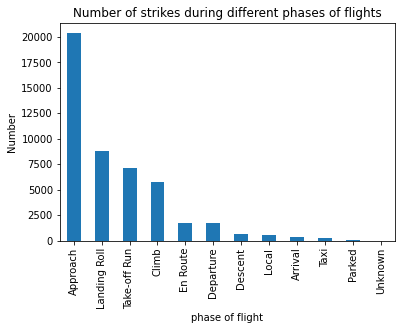

In [29]:
# построим столбчатую диаграмму с количеством страйков во время разных фаз полета воздушного судна
data.phase_of_flight.value_counts().plot.bar()
plt.title('Number of strikes during different phases of flights')
plt.xlabel('phase of flight')
plt.ylabel('Number')
plt.show()

Самое большое количество страйков зафиксировано во время фазы Approach, то есть при подготовке самолета к приземлению. Дадим каждой фазе небольшую расшифровку, а также изучим фазы полета в порядке их выполнения

The order:
- __departure__ This is the preparation time for flight. 
- __take-off run__ Takeoff run phase begins when the crew increases thrust for the purpose of lift-off. It ends when an initial climb is established or the crew aborts its takeoff. 
- __climb__ the period during which the aircraft climbs to a predetermined cruising altitude after take-off.
- __en route__ segment of flight from the termination point of a departure procedure to the origination point of an arrival procedure.
- __descent__  the decrease in altitude from cruise altitude to initial approach altitude. This is approximately 20 minutes from our estimated time of arrival
- __approach__ At this time, the aircraft has to be configured for landing, and this is predominately predetermined at the flight planning stage. The aircraft will gradually slow down, the flaps at the rear of the wings and the slats at the front of the wing will be extended to create more lift at a slower speed, which ultimately lowers our landing speed. The wheels will be lowered and the aircraft will line up on what they call ‘final’ and continue down the approach path and land.
- __landing roll__ After touchdown until aircraft exits the landing runway or comes to a stop, whichever occurs first.
- __arrival__ 
- __taxi__ This is manoeuvring from the runway after landing to the terminal via the taxiways to a designated arrival bay.
- __parked__

In [30]:
data.height.describe()

count    36088.000000
mean       897.433468
std       1840.930735
min          0.000000
25%          0.000000
50%         50.000000
75%       1000.000000
max      29000.000000
Name: height, dtype: float64

In [31]:
data.wnd.sample(5)

46393    350,5,N,0088,5
48538    999,9,C,0000,5
4458     200,5,N,0072,5
69392    170,5,N,0077,5
52765    070,1,N,0015,1
Name: wnd, dtype: object

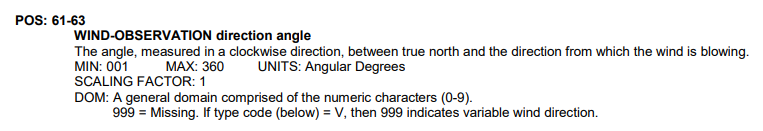

1. Необходимо разбить данные на несколько столбцов: я возьму 1 элемент - угол наклона ветра, 3 - тип ветра и 4 - скорость ветра. Контроли качества отброшу. 
2. можно заполнить пропуски значением (-1) - отсутствующие данные.
3. перевести угол наклона и скорость в целочисленное значение. 

In [32]:
data.loc[:, 'wind_direction'] = data.loc[:, 'wnd'].str.split(',', expand = True)[0]
data['wind_type'] = data['wnd'].str.split(',', expand=True)[2]
data['wind_speed'] = data['wnd'].str.split(',', expand=True)[3]

In [33]:
data['wind_direction'].nunique()

45

In [34]:
data['wind_direction'] = data['wind_direction'].fillna(-1)
data['wind_direction'] = data['wind_direction'].astype('int')
data['wind_direction'].unique()

array([150, 300, 260,  20, 320,  40,  90, 280, 340, 170, 999,  -1, 190,
       250, 100, 310, 270, 140,  50, 200, 350, 330, 160, 220, 230, 240,
       180,  30, 360, 290,  70,  80, 130, 110,  10,  60, 120, 210, 299,
       235, 351, 177,   6, 165, 326,  31])

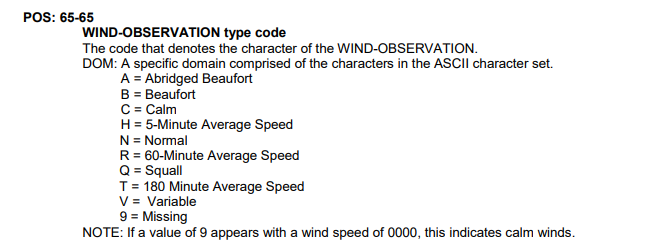

In [35]:
data['wind_type'].value_counts()

N    60639
C    11029
V     2461
9      426
R       48
Name: wind_type, dtype: int64

У нас имеются только N = normal, C = Calm, V = Variable, 9 = Missing, R = 60-Minute Average Speed

In [36]:
data['wind_type'] = data['wind_type'].fillna('-1')
data['wind_type'].unique()

array(['N', 'C', '-1', 'V', 'R', '9'], dtype=object)

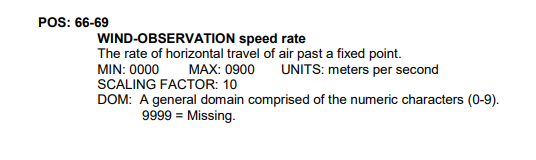

In [37]:
data['wind_speed'].unique()

array(['0021', '0026', '0046', '0015', '0000', nan, '0031', '0041',
       '0093', '0036', '0082', '0051', '0001', '0077', '0072', '0067',
       '0103', '0062', '0057', '9999', '0010', '0108', '0088', '0008',
       '0113', '0098', '0013', '0118', '0002', '0020', '0030', '0022',
       '0050', '0005', '0040', '0160', '0003', '0129', '0006', '0124',
       '0139', '0144', '0035', '0149', '0029', '0060', '0024', '0165',
       '0068', '0090', '0299', '0027', '0201', '0154', '0025', '0070',
       '0134', '0170', '0014', '0032', '0080', '0089'], dtype=object)

In [38]:
data['wind_speed'] = data['wind_speed'].fillna(999)
data['wind_speed'] = data['wind_speed'].astype(int)

In [39]:
data['wind_speed'] = data['wind_speed'] / 10.0
data['wind_speed'].unique()

array([2.100e+00, 2.600e+00, 4.600e+00, 1.500e+00, 0.000e+00, 9.990e+01,
       3.100e+00, 4.100e+00, 9.300e+00, 3.600e+00, 8.200e+00, 5.100e+00,
       1.000e-01, 7.700e+00, 7.200e+00, 6.700e+00, 1.030e+01, 6.200e+00,
       5.700e+00, 9.999e+02, 1.000e+00, 1.080e+01, 8.800e+00, 8.000e-01,
       1.130e+01, 9.800e+00, 1.300e+00, 1.180e+01, 2.000e-01, 2.000e+00,
       3.000e+00, 2.200e+00, 5.000e+00, 5.000e-01, 4.000e+00, 1.600e+01,
       3.000e-01, 1.290e+01, 6.000e-01, 1.240e+01, 1.390e+01, 1.440e+01,
       3.500e+00, 1.490e+01, 2.900e+00, 6.000e+00, 2.400e+00, 1.650e+01,
       6.800e+00, 9.000e+00, 2.990e+01, 2.700e+00, 2.010e+01, 1.540e+01,
       2.500e+00, 7.000e+00, 1.340e+01, 1.700e+01, 1.400e+00, 3.200e+00,
       8.000e+00, 8.900e+00])

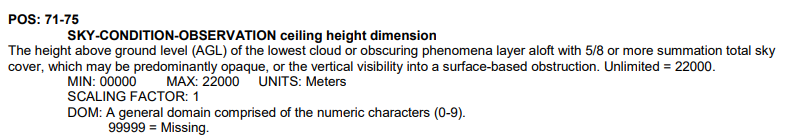

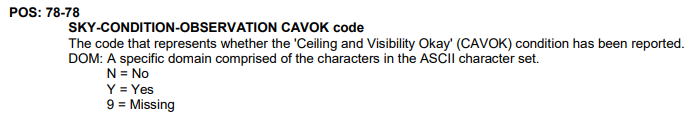

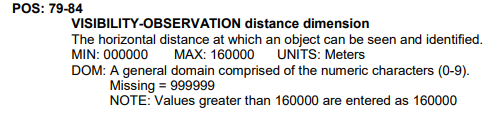

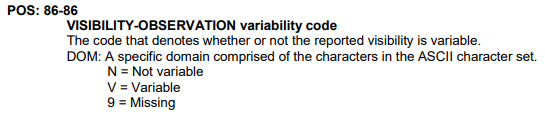

In [40]:
data['vis_distance'] = data['vis'].str.split(',', expand = True)[0]
data['vis_variability'] = data['vis'].str.split(',', expand = True)[2]
data['cig_distance'] = data['cig'].str.split(',', expand = True)[0]
data['cavok'] = data['cig'].str.split(',', expand = True)[3]

In [41]:
data['cig_distance'] = data['cig_distance'].fillna(99999)
data['cig_distance'] = data['cig_distance'].astype('int')

In [42]:
data['cig_distance'].unique()

array([22000,    61, 99999,  1219,   914,  1341,   396,  1250,   244,
         457,   305,  5486,    91,   853,   884,  1829,  9144,   240,
         640,  2438,  2896,   152,  4572,    60,  2286,  1280,   213,
         427,   549,   762,  1463,  1524,  1097,   518,  1372,   732,
        2134,   823,   122,  1006,   183,   120,   488,  5791,   274,
        1402,   335,  7620,  7315,  3353,   701,  1311,  2591,   671,
         610,  3658,  6096,  1128,  2743,  1676,  1981,   366,  6706,
         975,  4877,  1433,  1067,  7010,  4267,  1494,  5182,  3048,
        1189,  3962,  1036,   579,  8400,  8534,  1158,  3000,  6401,
           0,   945,  9000,  7925, 10668,   792,    30,  2700,  3600,
        2042,  2100,  2400,  8230,  8100, 10058,  2012,  1140,  1230,
        7800,  2408,  6000,  4500,  8839,  7200, 10363,  1500,   900,
        3300, 10500,  2377,   750,   420,  9449,   510,  4200,  4800,
        1200,   270,  1080,   300,  3597,  2347,   600,  1646,  1380,
         450])

In [43]:
data['vis_distance'].isna().sum()
data['vis_distance'] = data['vis_distance'].fillna(999999)
data['vis_distance'] = data['vis_distance'].astype(int)
data['vis_distance'].sample(10)

11958     16093
20228     16093
85317     16093
28503      2414
10496     16000
77119     16093
47401    999999
38839     16093
24429     16093
34159     16093
Name: vis_distance, dtype: int32

In [44]:
data.cavok.unique()

array(['N', nan, '9', 'Y'], dtype=object)

In [45]:
data['cavok'] = data['cavok'].fillna('9')
data.cavok.isna().sum()

0

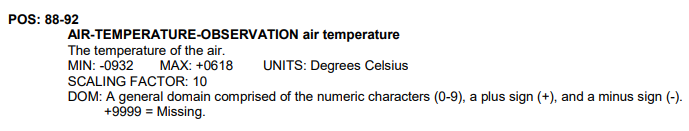

In [46]:
data['tmp'] = data['tmp'].str.split(',', expand = True)[0]
data['tmp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 86852 entries, 0 to 86871
Series name: tmp
Non-Null Count  Dtype 
--------------  ----- 
74603 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [47]:
data['tmp'].isna().sum()

12249

In [48]:
data['tmp'].sample(10)

58543      NaN
59183    +0139
25885      NaN
48860    +0306
20151      NaN
70784    +0056
45188    +0028
4299     +0189
70516    +0233
38914    +0217
Name: tmp, dtype: object

In [49]:
data['tmp'] = data['tmp'].fillna(9999)
data['tmp'] = data['tmp'].astype('int')
data['tmp'] = data['tmp'] / 10
data['tmp'].sample(10)

22777    12.0
82299    28.3
84548     9.4
59082    26.7
57479    -0.6
79960    -2.8
4947     21.7
66741    24.4
42739    20.0
9556      9.0
Name: tmp, dtype: float64

In [50]:
data['tmp'].isna().sum()

0

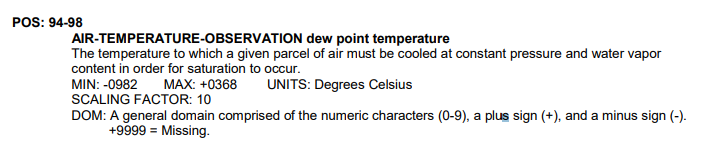

In [51]:
data['dew'].sample(5)

3982         NaN
56491        NaN
60367    +0222,5
27503    +0217,5
67587    +0033,5
Name: dew, dtype: object

In [52]:
data['dew_tmp'] = data['dew'].str.split(',', expand=True)[0]
data['dew_tmp'] = data['dew_tmp'].fillna(9999)
data['dew_tmp'] = data['dew_tmp'].astype('int')
data['dew_tmp'] = data['dew_tmp'] / 10
data['dew_tmp'].sample(10)

69683     22.2
37528     21.7
12021     -8.9
85882     22.8
22639    999.9
81884     20.0
78873     20.6
32166    999.9
67651      2.2
1212      22.0
Name: dew_tmp, dtype: float64

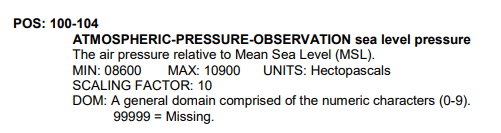

In [53]:
data['slp_hectopascals'] = data['slp'].str.split(',', expand=True)[0]
data['slp_hectopascals'] = data['slp_hectopascals'].fillna(99999)
data['slp_hectopascals'] = data['slp_hectopascals'].astype('int')

In [54]:
data['slp_hectopascals'] = data['slp_hectopascals'] / 10
data['slp_hectopascals'].sample(10)

34133    1025.2
55942    1006.2
28087    1018.0
2168     9999.9
71953    1020.3
3147     9999.9
9252     9999.9
2872     1005.2
30540    1013.2
1621     1018.4
Name: slp_hectopascals, dtype: float64

Руководствуясь <code>[таблицей](https://www.gradusniki.ru/help/mm-hpa.pdf) </code> перевода атмосферного давления из мм ртутного столба в гектопаскали, сделаем категоризацию по повышенному давлению, норме и пониженному

In [55]:
def categorize_slp(slp_hectopascals):
    try:
        if 973 <= slp_hectopascals <= 1012:
            return 'low'
        elif 1013 <= slp_hectopascals <= 1038:
            return 'normal'
        elif  slp_hectopascals >= 1040:
            return 'high'
        elif slp_hectopascals == 9999.9:
            return None
    except:
        pass

In [56]:
data['slp_level'] = data['slp_hectopascals'].apply(categorize_slp)

In [57]:
data['slp_level'].unique()

array(['normal', 'high', 'low', None], dtype=object)

In [58]:
#data.species_id.value_counts()

In [59]:
data[['species_id', 'species']].sample(10)

species_id               species
19683       UNKB          Unknown bird
34002       UNKB          Unknown bird
35563      O2212            Zebra dove
44773       UNKB          Unknown bird
43072      UNKBS  Unknown bird - small
53122       UNKB          Unknown bird
15772      YL001     European starling
18821          Y    Perching birds (y)
6744       YI005          Barn swallow
12346       UNKB          Unknown bird

In [60]:
data.species_id.isna().sum()

1

In [61]:
data.loc[data.species_id.isna()]

incident_date  incident_year  incident_month      time time_of_day  \
62660    2023-07-24           2023               7  21:20:00       Night   

       latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
62660    35.07297    -77.04294       KEWN      ASO     Take-off Run     0.0   

       speed species_id                          species         sky  \
62660    NaN        NaN  Killdeer (Charadrius vociferus)  Some Cloud   

                  wnd          cig           vis   tmp      dew      slp  \
62660  120,5,N,0031,5  22000,5,9,N  016093,5,N,5  29.4  +0233,5  10173,5   

       wind_direction wind_type  wind_speed  vis_distance vis_variability  \
62660             120         N         3.1         16093               N   

       cig_distance cavok  dew_tmp  slp_hectopascals slp_level  
62660         22000     N     23.3            1017.3    normal

In [62]:
data.dropna(subset = ['species_id'], inplace = True)

In [63]:
# уберем из таблицы всех животных, не относящихся к птицам - это коды, начинающиеся с 1, 2 или 3
all_data = data.loc[data.species_id.str.match('^[^123]')].copy()
all_data.sample(10)

incident_date  incident_year  incident_month      time time_of_day  \
86028    2021-04-12           2021               4  08:40:00         Day   
56979    2023-02-10           2023               2       NaT       Night   
33955    2019-05-21           2019               5  07:17:00        Dawn   
81622    2021-08-20           2021               8  11:29:00         Day   
47105    2022-08-02           2022               8  19:22:00         Day   
54231    2023-03-04           2023               3  21:57:00       Night   
33643    2022-02-06           2022               2  21:49:00       Night   
43852    2022-05-02           2022               5  00:00:00         NaN   
27218    2019-11-28           2019              11  11:13:00         NaN   
13102    2018-09-27           2018               9       NaT         NaN   

       latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
86028   42.114180   -87.901480       KPWK      AGL     Landing Roll     0.0   
56979   35.042420   -89.976670       KMEM      ASO         Approach  2000.0   
33955   42.212060   -83.348840       KDTW      AGL     Landing Roll     0.0   
81622   26.072580   -80.152750       KFLL      ASO         Approach    20.0   
47105   44.880550   -93.216920       KMSP      AGL         Approach     NaN   
54231   41.887606  -103.664386       NE41      ACE            Climb  1800.0   
33643   38.852080   -77.037720       KDCA      AEA         Approach   300.0   
43852   36.894610   -76.201220       KORF      AEA         Approach   700.0   
27218   26.683160   -80.095590       KPBI      ASO         Approach    50.0   
13102   38.747690   -90.359990       KSTL      ACE              NaN     NaN   

       speed species_id                species         sky             wnd  \
86028    NaN        NE1                  Gulls         NaN  300,5,N,0015,5   
56979  170.0      UNKBS   Unknown bird - small    No Cloud  100,1,N,0031,1   
33955    NaN      UNKBS   Unknown bird - small    Overcast  999,9,C,0000,5   
81622    NaN      YI005           Barn swallow    No Cloud  999,9,C,0000,5   
47105    NaN      K5114       American kestrel  Some Cloud  999,9,9,9999,9   
54231  120.0      UNKBL   Unknown bird - large    No Cloud  170,5,N,0082,5   
33643    NaN      UNKBM  Unknown bird - medium  Some Cloud  120,5,N,0046,5   
43852    NaN       UNKB           Unknown bird         NaN  170,1,N,0046,1   
27218    NaN      UNKBL   Unknown bird - large         NaN  999,9,C,0000,5   
13102    NaN      ZS006               Ovenbird         NaN  999,9,C,0000,1   

               cig           vis    tmp      dew      slp  wind_direction  \
86028  00335,5,M,N  016093,5,N,5   11.0  +0100,5  99999,9             300   
56979  22000,1,9,N  016000,1,9,9    4.4  +0022,1  10241,1             100   
33955  06096,5,M,N  016093,5,N,5    7.2  +0033,5  10212,5             999   
81622  22000,5,9,N  016093,5,N,5   27.8  +0239,5  10150,5             999   
47105  99999,9,9,9  999999,9,9,9  999.9  +9999,9  99999,9             999   
54231  22000,5,9,N  016093,5,N,5    5.0  -0061,5  10122,5             170   
33643  22000,5,9,N  016093,5,N,5    2.2  -0117,5  10322,5             120   
43852  99999,9,9,N  016000,1,9,9   21.7  +0156,1  10156,1             170   
27218  22000,5,9,N  011265,5,N,5   16.7  +0150,5  10223,5             999   
13102  22000,1,9,N  016000,1,9,9   12.2  +0089,1  10194,1             999   

      wind_type  wind_speed  vis_distance vis_variability  cig_distance cavok  \
86028         N         1.5         16093               N           335     N   
56979         N         3.1         16000               9         22000     N   
33955         C         0.0         16093               N          6096     N   
81622         C         0.0         16093               N         22000     N   
47105         9       999.9        999999               9         99999     9   
54231         N         8.2         16093               N         22000     N   
33643         N         4

In [64]:
all_data.drop(columns = ['wnd', 'cig', 'vis', 'dew', 'slp'], inplace = True)

In [65]:
all_data.incident_date.dt.year.unique()

array([2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [66]:
all_data = all_data.query('incident_year != 2023')
all_data.sample(2)

incident_date  incident_year  incident_month      time time_of_day  \
30419    2021-03-21           2021               3  22:10:00         NaN   
11976    2018-08-30           2018               8  22:16:00       Night   

       latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
30419         NaN          NaN       ZZZZ       NaN             NaN     NaN   
11976    35.04242    -89.97667       KMEM      ASO         Approach     NaN   

       speed species_id       species  sky    tmp  wind_direction wind_type  \
30419    NaN       UNKB  Unknown bird  NaN  999.9              -1        -1   
11976    NaN       UNKB  Unknown bird  NaN   25.0              30         N   

       wind_speed  vis_distance vis_variability  cig_distance cavok  dew_tmp  \
30419        99.9        999999             NaN         99999     9    999.9   
11976         7.2         16093               N          3048     N     23.3   

       slp_hectopascals slp_level  
30419            9999.9      high  
11976            9999.9      high

In [67]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73847 entries, 0 to 86871
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   incident_date     73847 non-null  datetime64[ns]
 1   incident_year     73847 non-null  int64         
 2   incident_month    73847 non-null  int64         
 3   time              60272 non-null  object        
 4   time_of_day       37254 non-null  object        
 5   latitude_x        63527 non-null  float64       
 6   longitude_x       63527 non-null  float64       
 7   airport_id        73847 non-null  object        
 8   faaregion         63527 non-null  object        
 9   phase_of_flight   41114 non-null  object        
 10  height            31466 non-null  float64       
 11  speed             17796 non-null  float64       
 12  species_id        73847 non-null  object        
 13  species           73847 non-null  object        
 14  sky               2995

___Вывод___

в ходе предобработки данные были проверены на пропуски, удалены дубликаты, был исправлен тип данных, где это было необходимо, заполнены пропуски там, где возможно -- в столбцах с данными о погоде, в столбце с временем суток там, где было заполнено время инцидента, по выбранному интервалу. Были добавлены новые столбцы с погодными параметрами. Были категоризированы данные по столбцу с уровнем атмосферного давления на три группы: высокое, нормальное и низкое. 

## Исследовательский анализ данных

In [68]:
all_data.sample(2)

incident_date  incident_year  incident_month      time time_of_day  \
9414     2019-01-21           2019               1       NaT         NaN   
47950    2022-10-15           2022              10  08:04:00         NaN   

       latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
9414          NaN          NaN       ZZZZ       NaN             NaN     NaN   
47950    41.93887    -72.68323       KBDL      ANE              NaN     NaN   

       speed species_id           species  sky    tmp  wind_direction  \
9414     NaN      O2205     Mourning dove  NaN  999.9              -1   
47950    NaN      K5114  American kestrel  NaN    5.0             260   

      wind_type  wind_speed  vis_distance vis_variability  cig_distance cavok  \
9414         -1        99.9        999999             NaN         99999     9   
47950         N         2.1         16093               N         22000     N   

       dew_tmp  slp_hectopascals slp_level  
9414     999.9            9999.9      high  
47950      3.9            1017.1    normal

### Количество инцидентов по месяцам и годам

In [69]:
# посчитаем количество инцидентов по месяцам и годам
col_incidents_per_months = all_data.groupby(
    ['incident_year', 'incident_month']
)['incident_date'].agg(['count']).reset_index().rename({
    'incident_year': 'year',
    'incident_month': 'month'
}, axis=1)
col_incidents_per_months['day'] = [1 for i in range(len(col_incidents_per_months))]
col_incidents_per_months['date'] = pd.to_datetime(
    col_incidents_per_months[['year', 'month', 'day']])
col_incidents_per_months.head(5)

year  month  count  day       date
0  2018      1    421    1 2018-01-01
1  2018      2    433    1 2018-02-01
2  2018      3    647    1 2018-03-01
3  2018      4   1086    1 2018-04-01
4  2018      5   1651    1 2018-05-01

In [70]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=col_incidents_per_months['date'],
    y=col_incidents_per_months['count'],
))
fig.update_layout(title = 'Распределение количества страйков по годам и месяцам',
                xaxis_title="год и месяц",
                yaxis_title="количество")
fig.show();

Заметна сезонность инцидентов: зимой стабильно меньше столкновений, чем летом. При этом в мае идет скачок, в июне спад, и уже с июля по октябрь видны пики - от 2000 инцидентов в месяц. Посольку мы знаем, что у птиц два периода миграции -- весной и осенью, то можно увидеть два пика соответственно - в мае и в октябре.

In [71]:
# проверим, сохраняется ли тренд по месяцам
month_strikes = all_data.pivot_table(index='incident_month', values='species_id', aggfunc='count').reset_index()
month_strikes

incident_month  species_id
0                1        2044
1                2        2187
2                3        3302
3                4        4915
4                5        7165
5                6        6165
6                7        9733
7                8       10599
8                9       10385
9               10        9794
10              11        4909
11              12        2649

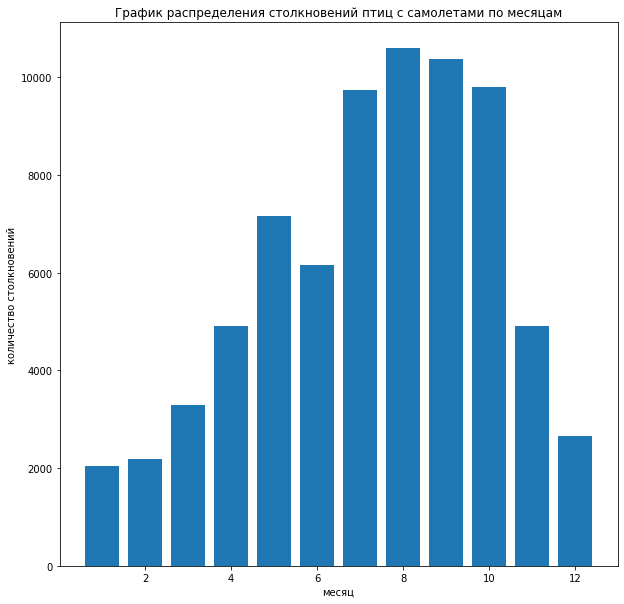

In [72]:
plt.figure(figsize=(10,10))
plt.bar(month_strikes['incident_month'], month_strikes['species_id'])
plt.title('График распределения столкновений птиц с самолетами по месяцам')
plt.xlabel('месяц')
plt.xticks
plt.ylabel('количество столкновений')
plt.show()

Тренд сезонности сохраняется. С мая по октябрь наблюдается период высоких значений страйков.

### Топ аэропортов по столкновениям и по сумме полетов

In [73]:
# сохраним только те аэропорты, по которым есть информация о полетах - это топ-22 аэропорта из таблицы с полетами.
final_data = all_data.loc[all_data.airport_id.str[1:].isin(flight_airports)]
final_data.sample(5)

incident_date  incident_year  incident_month      time time_of_day  \
5897     2018-09-30           2018               9       NaT         NaN   
84267    2021-08-03           2021               8  19:30:00        Dusk   
39341    2018-10-04           2018              10  22:29:00       Night   
66617    2020-09-24           2020               9  09:03:00         NaN   
63912    2020-10-06           2020              10  07:24:00         NaN   

       latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
5897     33.94254   -118.40807       KLAX      AWP              NaN     NaN   
84267    39.29761    -94.71391       KMCI      ACE            Climb     NaN   
39341    38.17439    -85.73600       KSDF      ASO          Descent  8300.0   
66617    39.04614    -84.66217       KCVG      ASO              NaN     NaN   
63912    33.64044    -84.42694       KATL      ASO              NaN     NaN   

       speed species_id                species         sky   tmp  \
5897     NaN      ZT002     Western meadowlark         NaN  17.2   
84267    NaN      O2205          Mourning dove  Some Cloud  27.2   
39341  250.0      UNKBM  Unknown bird - medium         NaN  27.8   
66617    NaN      O2205          Mourning dove         NaN  15.0   
63912    NaN      ZX310    Grasshopper sparrow         NaN  15.6   

       wind_direction wind_type  wind_speed  vis_distance vis_variability  \
5897              999         C         0.0         16000               9   
84267              50         N         3.1         16093               N   
39341             340         N         3.1         16093               N   
66617             270         N         2.1         16093               N   
63912             110         N         2.1         16093               N   

       cig_distance cavok  dew_tmp  slp_hectopascals slp_level  
5897          99999     N     15.0            1011.6       low  
84267         22000     N     12.2            1018.5    normal  
39341          2134     N     22.2            1016.1    normal  
66617          5486     N     12.8            1016.1    normal  
63912         22000     N     12.8            1020.0    normal

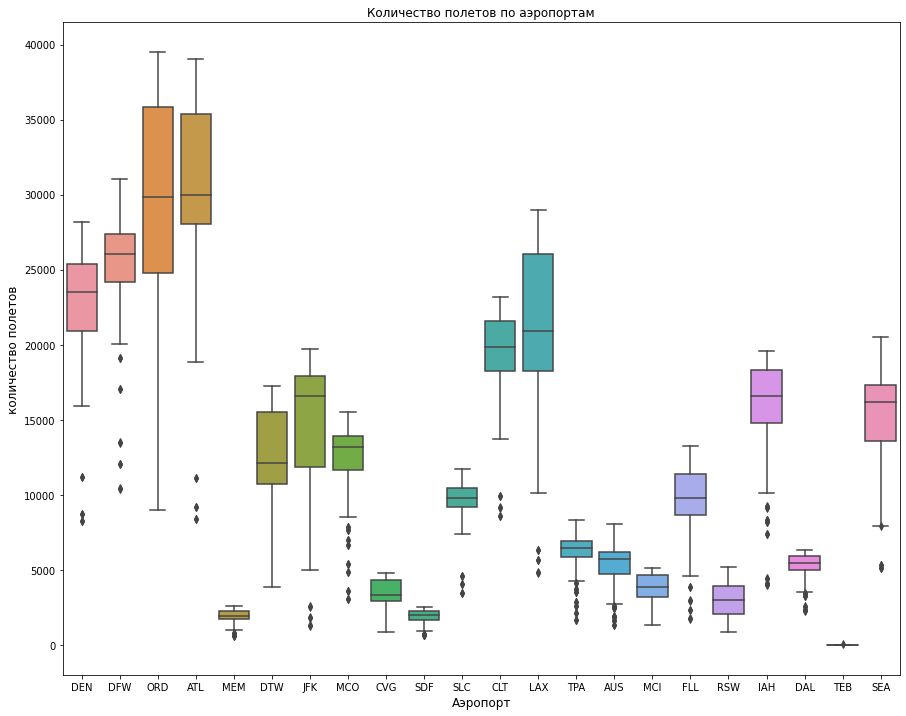

In [74]:
# посмотрим на аэропорты 
plt.figure(figsize=(15,12))
sns.boxplot(data=flights , x='airport', y='total');
plt.title('Количество полетов по аэропортам', fontsize=12)
plt.xlabel('Аэропорт', fontsize=12)
plt.ylabel('количество полетов',fontsize=12)
plt.show();

Аэропорт TEB почти не совершал вылетов, соответственно, этот выброс можно удалить. Самые загруженные аэропорты: ORD, ATL, LAX, DFW. Аэропоты с наименьшим количеством полетов: MEM, SDF, CVG, RSW, MCI.

In [75]:
flights = flights.query('airport != "TEB"')
final_data = final_data.query('airport_id != "KTEB"')

In [76]:
# проверим количество уникальных аэропортов до и после
print(all_data.airport_id.nunique())
print(final_data.airport_id.nunique())

1397
21


In [77]:
#построим сводную таблицу по году, месяцу, аэропортам и количеству страйков
df_strikes = final_data.groupby(
    ['airport_id', 'incident_year', 'incident_month']
)['species_id'].agg(['count']).reset_index().sort_values(by='count', ascending=False)
df_strikes['airport_id'] = df_strikes.airport_id.str[1:]
df_strikes = df_strikes.rename(columns={'airport_id':'airport', 'incident_year':'year', 'incident_month':'month'})
df_strikes.sample(5)

airport  year  month  count
267      DAL  2020      6     24
155      CLT  2020     12      3
501      FLL  2020      3      1
1047     SDF  2021      4     14
1157     SLC  2020      8     24

In [78]:
# объединим две таблицы по столбцам с уникальными данными - годом, месяцем и айди аэропортов.
df_strikes = df_strikes.merge(
    flights.groupby(['airport', 'year', 'month'])['total'].agg(['mean']).reset_index()
).rename(columns={'count':'strikes', 'mean':'flights'})

df_strikes.sample(5)

airport  year  month  strikes  flights
1023     CVG  2019      1        5   3961.5
1019     CLT  2022      3        5  19115.0
36       DEN  2019     10       55  26545.5
273      CVG  2022      8       22   3368.5
363      DEN  2021     11       19  23813.0

In [79]:
# сгруппируем данные по инцидентам в каждом аэропорту 
airport_total = df_strikes.groupby('airport')['strikes'].sum()

# сумма всех столкновений
strikes_sum = airport_total.sum()

strikes_percentage = (airport_total/strikes_sum) * 100

top_strikes_airports = strikes_percentage.sort_values(ascending=False).head(10)

top_airports = top_strikes_airports.reset_index()
top_airports.columns = ['airport', 'strikes%']

fig = px.bar(
    top_airports,
    x = 'airport',
    y='strikes%',
    text = "strikes%",
    title = "Топ-10 аэропортов по количеству страйков в процентном соотношении")

fig.update_traces(texttemplate = '%{text:.2f}%', textposition='outside')

fig.show()


In [80]:
# сгруппируем данные по аэропорту и суммируем страйки и количество полетов
airports_total = df_strikes.groupby('airport')[['strikes', 'flights']].sum()

# отношение общего числа инцидентов по каждому аэропорту к числу полетов
airports_total['incidents_ratio'] = round(airports_total['strikes']/airports_total['flights'] * 100,2)
top10_airports = airports_total.sort_values(by='incidents_ratio', ascending=False).reset_index().head(10)

top10_airports

airport  strikes    flights  incidents_ratio
0     MEM     1179   112428.0             1.05
1     SDF      816   113111.0             0.72
2     CVG      796   206718.5             0.39
3     MCI      697   215483.5             0.32
4     RSW      538   179195.5             0.30
5     DAL      638   301696.5             0.21
6     AUS      655   325385.0             0.20
7     DEN     2550  1353000.0             0.19
8     TPA      589   365544.0             0.16
9     SLC      914   569458.5             0.16

In [81]:
fig = px.bar(
    top10_airports,
    x = 'airport',
    y='incidents_ratio',
    text = "incidents_ratio",
    title = "Топ-10 аэропортов по числу страйков от общего количества полетов")

fig.update_traces(texttemplate = '%{text:.2f}%', textposition='outside')

fig.show()

По количеству страйков лидирует аэропорт Денвера, Даллас Форт-Уэрт, О'Хара, Мемфис, Атланты.

По относительным показателям (соотношение числа страйков к полетам) лидирует аэропорт Мемфиса, самый незагруженный аэропорт датасета, скорее всего, не крупный хаб, а локальный аэропорт. Примечательно, что в эту же выборку попал аэропорт Денвера, один из крупнейших в США. Он лидировал по количеству страйков в абсолютном выражении, но в относительных величинах, ситуация уже иная: он все еще входит в топ-10 аэропортов по столкновениям, но занимает уже не первое, а восьмое место. Нельзя сказать, что чем загруженнее аэропорт, тем больше страйков там происходит. Скорее наоборот, чем меньше аэропорт, тем чаще там случаются столкновения. 

Отмечу также, что пятерка самых крупных в мире аэропортов - это аэропорты Атланты, Далласа, Денвера, Чикаго (ORD) и Лос-Анджелеса. В десятку крупнейших аэропортов в США еще входят аэропорты Шарлотты/Дуглас (CLT), Орландо (MCO)и Лас-Вегас (LAS)

In [82]:
df_strikes.airport.unique()

array(['DEN', 'DFW', 'DTW', 'JFK', 'ORD', 'MEM', 'MCI', 'ATL', 'SDF',
       'SLC', 'CVG', 'MCO', 'CLT', 'RSW', 'LAX', 'FLL', 'AUS', 'DAL',
       'SEA', 'IAH', 'TPA'], dtype=object)

В соответствии с [таблицей](https://www.leonardsguide.com/us-airport-codes.shtml) кодов аэропортов США, можно сделать следующие пометки:

1. ATL - Atlanta Hartsfield International Airport (Georgia)
2. AUS - Austin Bergstrom International Airport (Texas)
3. CLT - Charlotte/Douglas International Airport (North Carolina)
4. CVG -  Cincinnati (Ohio)
5. DAL - Dallas Love Field Airport (Texas)
6. DEN - Denver International Airport (Colorado)
7. DFW - Dallas/Fort Worth International Airport (Texas)
8. DTW - Detroit Metropolitan Airport (Michigan)
9. FLL - Fort Lauderdale-Hollywood International Airport (Florida)
10. IAH - Houston, George Bush Intercontinental Airport (Texas)
11. JFK - New York, John F Kennedy International Airport (New York)
12. LAX - Los Angeles International Airport (California)
13. MCO - Orlando (Florida)
14. MEM - Memphis (Tennessee)
15. ORD - Chicago, O'Hare International Airport (Illinois)
16. RSW - Fort Meyers (Florida)
17. SDF - Louisville (Kentucky)
18. SEA - Seattle, Tacoma International Airport (Washington)
19. SLC - Salt Lake City (Utah)
20. TPA - Tampa (Florida)
21. MCI - Kansas City (Missouri)
22. TEB - Teterboro Airport (New Jersey)

In [83]:
# рассмотрим отдельно аэропорты Мемфиса и Денвера, посмотрим, как менялись за 5 лет показатели по страйкам
Memfis = df_strikes.query('airport == "MEM"').sort_values(by=['year', 'month'])

Memfis['day'] = [1 for i in range(len(Memfis))]
Memfis['date'] = pd.to_datetime(
    Memfis[['year', 'month', 'day']])

fig = go.Figure()
fig.add_trace(go.Bar(
    x=Memfis['date'],
    y=Memfis['strikes'],
))
fig.update_layout(title = 'Распределение количества страйков в аэропорту Мемфиса за 5 лет по месяцам',
                xaxis_title="год",
                yaxis_title="количество")
fig.show();

In [84]:
Denver = df_strikes.query('airport == "DEN"').sort_values(by=['year', 'month'])

Denver['day'] = [1 for i in range(len(Denver))]
Denver['date'] = pd.to_datetime(
    Denver[['year', 'month', 'day']])

fig = go.Figure()
fig.add_trace(go.Bar(
    x=Denver['date'],
    y=Denver['strikes'],
))
fig.update_layout(title = 'Распределение количества страйков в аэропорту Денвера за 5 лет по месяцам',
                xaxis_title="год",
                yaxis_title="количество")
fig.show();

### Взаимосвязь погодных условий с числом столкновений

#### Изучение данных по температуре

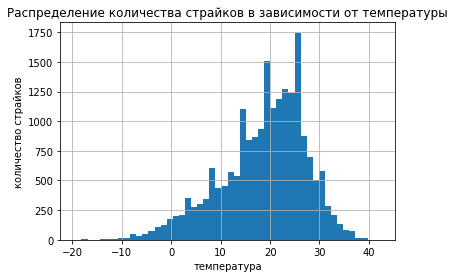

In [85]:
final_data.query('tmp != 999.9').tmp.hist(bins = 50)
plt.title('Распределение количества страйков в зависимости от температуры')
plt.xlabel('температура')
plt.ylabel('количество страйков')
plt.show()

Почти нормальное распределение температурных значений с небольшим отклонением влево. Кроме того, заметны пики, повторяющиеся примерно каждые 5 градусов. 

In [86]:
# температура точки росы
print(final_data.query('dew_tmp != 999.9').dew_tmp.min())
print(final_data.query('dew_tmp != 999.9').dew_tmp.max())
print(final_data.query('dew_tmp != 999.9').dew_tmp.median())

-25.6
27.2
13.3


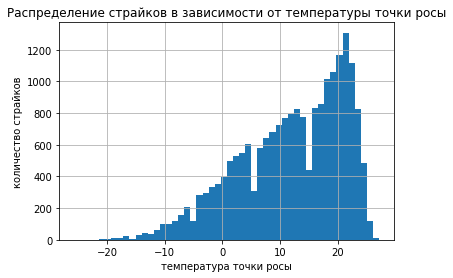

In [87]:
final_data.query('dew_tmp != 999.9').dew_tmp.hist(bins=50)
plt.title('Распределение страйков в зависимости от температуры точки росы')
plt.xlabel('температура точки росы')
plt.ylabel('количество страйков')
plt.show()

Распределение с отклонением влево. Заметно постепенное увеличение страйков с увеличением температуры точки росы.

In [88]:
# посмотрим, есть ли зависимость по температуре в рандомном аэропорте
final_data.query('airport_id == "KATL"').groupby(
    ['incident_year', 'incident_month', 'airport_id']
)['tmp'].agg(['median', 'count']).reset_index().sample(10)

incident_year  incident_month airport_id  median  count
17           2019               6       KATL   23.30     25
34           2020              11       KATL   14.00     19
12           2019               1       KATL    1.70      7
9            2018              10       KATL   19.40     34
28           2020               5       KATL   21.10      8
23           2019              12       KATL    7.20      7
19           2019               8       KATL   25.85     26
55           2022               8       KATL   23.90     31
59           2022              12       KATL   11.95      6
10           2018              11       KATL    8.30     25

Судя по таблице, пока можно только грубо предположить, что с повышением температуры повышается риск страйков. Стоит позже рассмотреть регионы по средним температурам и разделить на условно теплые и условно холодные регионы, чтобы точнее сказать, больше ли страйков в теплых регионах или же нет.

In [89]:
# посмотрим среднегодовую температуру в регионах
regions_mean_tmp = final_data.query('tmp != 999.9')\
    .groupby(
        ['faaregion']
    )['tmp'].agg(['mean']).sort_values(
    by = 'mean', ascending=False).reset_index()
regions_mean_tmp

faaregion       mean
0      ASW   21.561653
1      ASO   20.871121
2      ACE   17.841007
3      AWP   17.564036
4      AGL   16.434935
5      ANM   15.028416
6      AEA   14.592750

В усредненных данных самые холодные регионы: ANM, AEA, AGL

Самые теплые: ASW, ASO, ACE

In [90]:
# сделаем сводную таблицу по регионам, годам, месяцам и аэропортам и посчитаем среднюю температуру и кол-во страйков
regions_tmp = final_data.groupby(['faaregion', 'incident_year', 'incident_month', 'airport_id'])[['tmp']].\
agg({'tmp': ['mean', 'count']}).droplevel(0,1).reset_index()
regions_tmp.airport_id = regions_tmp.airport_id.str[1:]
regions_tmp.head(10)

faaregion  incident_year  incident_month airport_id       mean  count
0      ACE            2018               2        MCI   3.050000      4
1      ACE            2018               3        MCI   4.150000      2
2      ACE            2018               4        MCI  13.200000      4
3      ACE            2018               5        MCI  18.336842     19
4      ACE            2018               6        MCI  23.500000     16
5      ACE            2018               7        MCI  22.628302     53
6      ACE            2018               8        MCI  19.991176     34
7      ACE            2018               9        MCI  46.605714     35
8      ACE            2018              10        MCI  12.126316     38
9      ACE            2018              11        MCI   2.320000      5

In [91]:
# суммируем кол-во вылетов и прилетов по разным аэропортам в таблице с полетами
total_flights = flights.groupby(['year', 'month', 'airport'])['total'].agg(['sum']).reset_index()
total_flights.head(10)

year  month airport    sum
0  2018      1     ATL  66907
1  2018      1     AUS   9702
2  2018      1     CLT  39493
3  2018      1     CVG   7823
4  2018      1     DAL  12019
5  2018      1     DEN  43930
6  2018      1     DFW  49831
7  2018      1     DTW  29512
8  2018      1     FLL  23444
9  2018      1     IAH  34523

In [92]:
# объединим таблицы
regions_tmp = regions_tmp.merge(total_flights, left_on=['incident_year', 'incident_month', 'airport_id'], 
    right_on=['year', 'month','airport'])
regions_tmp = regions_tmp.drop(columns=['year', 'month', 'airport'])
regions_tmp.head(10)

faaregion  incident_year  incident_month airport_id       mean  count    sum
0      ACE            2018               2        MCI   3.050000      4   8179
1      ACE            2018               3        MCI   4.150000      2   9851
2      ACE            2018               4        MCI  13.200000      4   9506
3      ACE            2018               5        MCI  18.336842     19   9929
4      ACE            2018               6        MCI  23.500000     16  10092
5      ACE            2018               7        MCI  22.628302     53  10249
6      ACE            2018               8        MCI  19.991176     34  10247
7      ACE            2018               9        MCI  46.605714     35   9348
8      ACE            2018              10        MCI  12.126316     38  10061
9      ACE            2018              11        MCI   2.320000      5   9036

In [93]:
# глянем среднегодовую температуру и общее кол-во полетов по регионам и количество страйков
regions_tmp_strikes = regions_tmp.groupby(['faaregion', 'incident_year'])[['mean', 'count', 'sum']].\
agg({'mean': 'mean',
     'count': 'sum',
    'sum': 'sum'}).reset_index().\
rename(columns={'mean': 'mean_tmp',
               'count': 'strikes_cnt',
               'sum': 'flights_sum'})
regions_tmp_strikes.head(10)

faaregion  incident_year   mean_tmp  strikes_cnt  flights_sum
0      ACE            2018  15.082577          212       105914
1      ACE            2019  14.966026          157       111147
2      ACE            2020  13.459986          105        57206
3      ACE            2021  14.087653          111        75095
4      ACE            2022  15.136214          112        81605
5      AEA            2018  11.869044          223       428683
6      AEA            2019  11.604134          244       425803
7      AEA            2020  12.422327          118       171481
8      AEA            2021  13.009365          227       258691
9      AEA            2022  12.361256          250       408417

In [94]:
correlation_matrix = regions_tmp_strikes.corr()

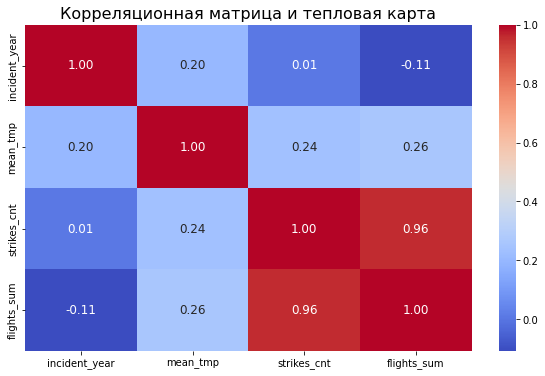

In [95]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Корреляционная матрица и тепловая карта', fontsize=16)
plt.show()

Ничего нового не увидели. Чем больше полетов, тем выше вероятность страйка. Как будто есть небольшая зависимость от температуры.

In [96]:
regions_tmp_strikes.sample(2)

faaregion  incident_year   mean_tmp  strikes_cnt  flights_sum
10      AGL            2018  11.016129          628      1234607
5       AEA            2018  11.869044          223       428683

In [97]:
# График для средней температуры
fig1 = px.line(regions_tmp_strikes, x='incident_year', y='mean_tmp', color='faaregion',
               title='Средняя температура по регионам и годам')

# График для количества столкновений
fig2 = px.line(regions_tmp_strikes, x='incident_year', y='strikes_cnt', color='faaregion',
               title='Количество столкновений по регионам и годам')

# График для суммы полетов
fig3 = px.line(regions_tmp_strikes, x='incident_year', y='flights_sum', color='faaregion',
               title='Сумма полетов по регионам и годам')

# Отобразите графики
fig1.show()
fig2.show()
fig3.show()

По медианной температуре самые теплые регионы: 
ASO - Southern, ASW - Southwest, AWP - Western Pacific

Самые холодные: 
ACE – Central, AEA – Eastern, AGL – Great Lakes

По количеству столкновений лидируют: Southern,  Northwest Mountain, Southwest

По сумме полетов: Southern, Southwest и Northwest Mountain

In [98]:
# построим то же самое по аэропортам
airports_tmp = final_data.groupby(
    ['incident_year', 'incident_month', 'airport_id']
)['tmp'].agg(['mean', 'count']).reset_index()

airports_tmp.airport_id = airports_tmp.airport_id.str[1:]
airports_tmp.head(10)

incident_year  incident_month airport_id        mean  count
0           2018               1        ATL    0.000000      7
1           2018               1        AUS   14.200000      4
2           2018               1        CLT   -0.850000      4
3           2018               1        CVG  202.760000      5
4           2018               1        DAL    1.000000      5
5           2018               1        DEN    0.714286      7
6           2018               1        DFW    2.627273     11
7           2018               1        DTW    1.033333      6
8           2018               1        FLL   12.780000      5
9           2018               1        IAH    9.757143      7

In [99]:
airports_tmp = airports_tmp.merge(total_flights, left_on=['incident_year', 'incident_month', 'airport_id'], 
    right_on=['year', 'month','airport'])
airports_tmp.head(10)

incident_year  incident_month airport_id        mean  count  year  month  \
0           2018               1        ATL    0.000000      7  2018      1   
1           2018               1        AUS   14.200000      4  2018      1   
2           2018               1        CLT   -0.850000      4  2018      1   
3           2018               1        CVG  202.760000      5  2018      1   
4           2018               1        DAL    1.000000      5  2018      1   
5           2018               1        DEN    0.714286      7  2018      1   
6           2018               1        DFW    2.627273     11  2018      1   
7           2018               1        DTW    1.033333      6  2018      1   
8           2018               1        FLL   12.780000      5  2018      1   
9           2018               1        IAH    9.757143      7  2018      1   

  airport    sum  
0     ATL  66907  
1     AUS   9702  
2     CLT  39493  
3     CVG   7823  
4     DAL  12019  
5     DEN  43930  
6     DFW  49831  
7     DTW  29512  
8     FLL  23444  
9     IAH  34523

In [100]:
airports_tmp = airports_tmp.drop(columns = ['year', 'month', 'month'])

In [101]:
airports = airports_tmp.groupby(
    ['airport_id', 'incident_year']
)[['mean', 'count', 'sum']].agg({
    'mean': 'mean',
    'count': 'sum',
    'sum': 'sum'
}).reset_index().rename(
columns={'mean': 'mean_tmp', 
        'count': 'strikes_cnt', 
        'sum': 'flights_sum'})
airports.head(10)

airport_id  incident_year   mean_tmp  strikes_cnt  flights_sum
0        ATL           2018  15.862469          241       859781
1        ATL           2019  17.765350          250       867927
2        ATL           2020  16.850472          162       518910
3        ATL           2021  17.569674          237       669856
4        ATL           2022  27.207627          276       686732
5        AUS           2018  20.671958          153       131981
6        AUS           2019  20.306264          164       137938
7        AUS           2020  19.246483           84        74538
8        AUS           2021  18.772416          112       123982
9        AUS           2022  19.811958          142       182331

In [102]:
# График для медианной температуры
fig1 = px.line(airports, x='incident_year', y='mean_tmp', color='airport_id',
               title='Медианная температура в аэропортах по годам')

# График для количества столкновений
fig2 = px.line(airports, x='incident_year', y='strikes_cnt', color='airport_id',
               title='Количество столкновений в аэропортах по годам')

# График для суммы полетов
fig3 = px.line(airports, x='incident_year', y='flights_sum', color='airport_id',
               title='Сумма полетов в аэропортах по годам')

# Отобразите графики
fig1.show()
fig2.show()
fig3.show()

По **температуре** лидируют следующие аэропорты: FLL (во Флориде), TPA (Флорида), RSW (Флорида)

**По количеству страйков**: DEN (Колорадо), DFW (Техас), ORD (Иллинойс)

**По количеству полетов**: ATL (Джорджия), ORD (Иллинойс), DFW (Техас)

Любопытно, что все они южные.

Тогда посмотрим, где меньше всего страйков и ниже температура. 

**Самая низкая температура**: DEN, ORD, SLC(Юта) (Странно, что низкая медианная температура оказалась в Колорадо и в Иллинойсе)

**По количеству столкновений**: (TEB), SEA(Вашингтон), RSW, FLL

**По количеству полетов**: RSW(Флорида), CVG(Кентукки), MEM (Теннеси) 

Аэропорт TEB не совершал вылетов, соответственно, можем его удалить из обеих выборок.

#### Зависимость сезонных миграций от погоды

In [103]:
final_data.sample(2)

incident_date  incident_year  incident_month      time time_of_day  \
44257    2022-09-15           2022               9  00:30:00         NaN   
48065    2022-10-17           2022              10  02:15:00         NaN   

       latitude_x  longitude_x airport_id faaregion phase_of_flight  height  \
44257    33.64044    -84.42694       KATL      ASO              NaN     NaN   
48065    41.97960    -87.90446       KORD      AGL              NaN     NaN   

       speed species_id        species  sky   tmp  wind_direction wind_type  \
44257    NaN      T1002  Chimney swift  NaN  24.4              80         N   
48065    NaN      N5111       Killdeer  NaN   7.2             310         N   

       wind_speed  vis_distance vis_variability  cig_distance cavok  dew_tmp  \
44257         2.1         16093               N         22000     N     14.4   
48065         7.2         16093               N          2134     N      0.0   

       slp_hectopascals slp_level  
44257            1017.3    normal  
48065            1013.1    normal

In [104]:
final_data.query(
    'incident_month > 2 and incident_month < 6 and tmp != 999.9 and wind_direction != 999 and wind_speed != 999.9'
).groupby([
    'incident_year',
    'incident_month',
    'airport_id'
])[['tmp', 'wind_direction', 'wind_speed', 'incident_date']].agg({
    'tmp': 'median',
    'wind_direction': lambda x: pd.Series.mode(x)[0],
    'wind_speed': 'median',
    'incident_date': 'count'
}).reset_index().head(10)

incident_year  incident_month airport_id    tmp  wind_direction  \
0           2018               3       KATL   7.80              80   
1           2018               3       KAUS  20.00             160   
2           2018               3       KCLT  10.60             100   
3           2018               3       KCVG   5.00             200   
4           2018               3       KDAL  16.15             180   
5           2018               3       KDEN   3.90             240   
6           2018               3       KDFW  18.90              20   
7           2018               3       KDTW  -3.90              20   
8           2018               3       KFLL  21.65             110   
9           2018               3       KIAH  18.35             110   

   wind_speed  incident_date  
0        4.10             11  
1        2.60              5  
2        4.10              5  
3        5.15              4  
4        4.10             16  
5        4.60             18  
6        5.10              7  
7        4.10             11  
8        3.10              4  
9        3.35              6

In [105]:
final_data.query(
    'incident_month > 8 and incident_month < 12 and tmp != 999.9 and wind_direction != 999 and wind_speed != 999.9'
).groupby([
    'incident_year',
    'incident_month'
])[['tmp', 'wind_direction', 'wind_speed', 'incident_date']].agg({
    'tmp': 'median',
    'wind_direction': lambda x: pd.Series.mode(x)[0],
    'wind_speed': 'median',
    'incident_date': 'count'})

tmp  wind_direction  wind_speed  incident_date
incident_year incident_month                                                  
2018          9               21.85              10         3.6            546
              10              15.00             310         3.6            501
              11              10.30             180         4.1            214
2019          9               22.80             170         3.6            498
              10              16.10             300         4.1            504
              11               8.90             340         3.1            242
2020          9               20.60              20         3.1            357
              10              15.60             350         3.6            313
              11              13.95             180         3.6            182
2021          9               21.70             350         3.6            409
              10              18.90             340         3.6            406
              11              10.00              10         3.6            208
2022          9               22.20             330         3.6            554
              10              16.10             350         3.6            466
              11              12.80             230         4.1            254

Согласно [таблице](https://ru-ecology.info/static/pngbig/916084986.png) перевода градусов в румбы, иллюстрирующие более понятное направление ветра, напишем функцию, которая переведет численные значения в буквенные

In [106]:
def wind_rose(v):
    DEG_TO_RUMBS = {
        22: 'N',
        68: 'NE',
        112: 'E',
        158: 'SE',
        202: 'S',
        248: 'SW',
        292: 'W',
        338: 'NW',
        360: 'N'
    }
    
    for deg, rumb in DEG_TO_RUMBS.items():
        if v <= deg:
            return rumb
#     raise Exception(f'Incorrect degree value: {v}')
    return ''
    
final_data['rumbs'] = final_data['wind_direction'].apply(wind_rose)

In [107]:
final_data['rumbs'].unique()

array(['SE', 'NW', 'E', 'S', '', 'NE', 'SW', 'W', 'N'], dtype=object)

In [108]:
wnd_rumbs_count = final_data.query(
    'wind_direction != 999'
).groupby(
    'rumbs'
)['incident_date'].agg(
    ['count']
).reset_index().sort_values(by='count', ascending=False)
wnd_rumbs_count

rumbs  count
4     S   3806
1     N   2498
6    SW   2486
7     W   1906
0     E   1827
5    SE   1800
2    NE   1666
3    NW   1656

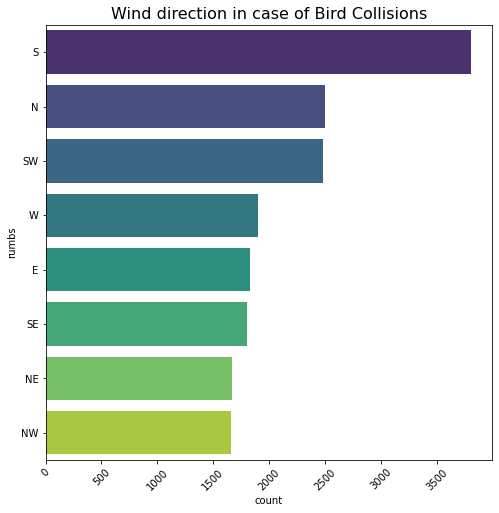

In [109]:
# посмотрим, при каком ветре большое количество страйков
plt.figure(figsize=(8, 8))
sns.barplot(x='count', y='rumbs', data=wnd_rumbs_count, orient='h', palette='viridis')
plt.title("Wind direction in case of Bird Collisions", fontsize=16)

# Поворачиваем метки для лучшей читаемости
plt.xticks(rotation=45)

plt.show()

Видим, что больше всего столкновений приходится на период, когда дует южный ветер. 

__То, что удалось почерпнуть про миграции птиц из интернета__: 

Метеорологические  факторы  зачастую  выполняют роль  триггера  для  начала  миграций.  Они  могут  замедлить  или  остановить мигрантов, заставить их отклониться от курса, приземлиться, иногда приводят к  летальному  исходу.  Например,  массивные  дождевые  фронты  блокируют миграцию.  У  птиц  существует  тенденция  избегать  миграционных  перелетов под воздействием холодных воздушных масс, в то же время есть определенные погодные  условия,  когда  миграция  усиливается.  Так,  осенняя  массовая миграция в высоких широтах северного полушария сопутствует перемещению зоны  низкого  давления  антициклонами.  Весной  массовые  пролеты  птиц происходят  в  условиях  мягкой  погоды,  когда  приближается  фронт  низкого давления.  Мигранты  преимущественно  реагируют  на  местные  изменения погоды  -  ветра  или  температуру,  в  большей  степени,  чем  на  синоптические условия. Большинство исследователей склоняется к мысли, что ветер и  осадки являются  двумя  наиболее  значимыми  факторами,  влияющими  на интенсивность миграции. Роль температуры несколько меньше.

### Время суток и количество столкновений

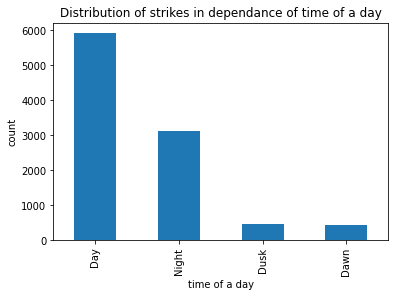

In [110]:
final_data.groupby('time_of_day')['incident_date']\
.agg(['count']).sort_values(by='count', ascending = False)\
.reset_index().plot.bar(x='time_of_day', y = 'count', legend = False)
plt.title('Distribution of strikes in dependance of time of a day')
plt.xlabel('time of a day')
plt.ylabel('count')
plt.show()

In [111]:
strikes_per_time_of_day = final_data.query('time_of_day != "Dawn" and time_of_day != "Dusk"').groupby(
    ['incident_year', 'incident_month', 'time_of_day']
)['airport_id'].agg(['count']).reset_index()
strikes_per_time_of_day.head(10)

incident_year  incident_month time_of_day  count
0           2018               1         Day     31
1           2018               1       Night     12
2           2018               2         Day     42
3           2018               2       Night     18
4           2018               3         Day     40
5           2018               3       Night     35
6           2018               4         Day     78
7           2018               4       Night     47
8           2018               5         Day    119
9           2018               5       Night     85

In [112]:
strikes_per_time_of_day['day'] = [1 for i in range(len(strikes_per_time_of_day))]
strikes_per_time_of_day = strikes_per_time_of_day.rename(columns={'incident_year': 'year', 'incident_month': 'month'})
strikes_per_time_of_day['date'] = pd.to_datetime(
    strikes_per_time_of_day[['year', 'month', 'day']])
strikes_per_time_of_day.head(10)

year  month time_of_day  count  day       date
0  2018      1         Day     31    1 2018-01-01
1  2018      1       Night     12    1 2018-01-01
2  2018      2         Day     42    1 2018-02-01
3  2018      2       Night     18    1 2018-02-01
4  2018      3         Day     40    1 2018-03-01
5  2018      3       Night     35    1 2018-03-01
6  2018      4         Day     78    1 2018-04-01
7  2018      4       Night     47    1 2018-04-01
8  2018      5         Day    119    1 2018-05-01
9  2018      5       Night     85    1 2018-05-01

In [113]:
fig = px.histogram(
    strikes_per_time_of_day,
    x='date',
    y='count',
    color = 'time_of_day',
    barmode = 'group',
    nbins = 60
)
fig.update_layout(title = 'Strikes distribution during years and months in dependance of time of day',
                xaxis_title="year",                
                yaxis_title="number")
fig.show();

Видно, что количество страйков днем и ночью примерно похожее. Пики почти везде повторяются по месяцам, на которые приходится сезонный пик миграций и соответственно число столкновений птиц с воздушными суднами. 

### Фаза полета и количество столкновений

In [114]:
final_data.airport_id = final_data.airport_id.str[1:]

In [115]:
fig = px.bar(
    final_data.query('phase_of_flight != "Unknown"').groupby(
        ['airport_id', 'phase_of_flight'])['incident_date']\
    .agg(['count']).reset_index(),
    x='airport_id', y='count', color='phase_of_flight')

fig.update_layout(yaxis={'categoryorder':'category ascending'},
                title = 'Strikes distribution in dependance of phase of flight in airports',
                xaxis_title="phase of flight",                
                yaxis_title="number of strikes")
fig.show()

График иллюстрирует, что самое большое количество столкновений приходится на фазу Approach (300 метров над ВПП), Landing Roll, Take-off Run (до300 метров), что свидетельствует о небольшой высоте, на которых происходят столкновения. То есть столкновения преимущественно происходят при взлете и посадке на взлетно-посадочную полосу. 

In [116]:
approach_strikes = final_data.query('phase_of_flight == "Approach"').groupby(
    'airport_id')['incident_date'].agg(['count'])\
.sort_values(by='count', ascending=False)\
.reset_index()
approach_strikes

airport_id  count
0         MEM    606
1         CLT    423
2         ATL    417
3         SDF    406
4         JFK    361
5         MCO    310
6         DFW    306
7         IAH    270
8         ORD    256
9         SLC    243
10        LAX    221
11        AUS    216
12        DEN    212
13        MCI    186
14        FLL    158
15        SEA    154
16        DAL    150
17        DTW    136
18        TPA    136
19        CVG    117
20        RSW    102

In [117]:
fig = px.bar(approach_strikes, x='airport_id', 
             y = 'count', 
             title='Количество столкновений во время фазы Approach')
fig.update_layout(
                 xaxis_title="аэропорт",                
                 yaxis_title="количество страйков")
fig.show()

In [118]:
landing_roll_strikes = final_data.query('phase_of_flight == "Landing Roll"').groupby(
    'airport_id')['incident_date'].agg(['count'])\
.sort_values(by='count', ascending=False)\
.reset_index()
landing_roll_strikes

airport_id  count
0         DEN    408
1         DTW    215
2         ORD    191
3         MCO    183
4         DFW    147
5         LAX    118
6         JFK    112
7         CLT    103
8         ATL     91
9         CVG     84
10        IAH     83
11        SLC     78
12        FLL     73
13        TPA     73
14        SEA     64
15        MCI     63
16        AUS     62
17        RSW     49
18        MEM     45
19        SDF     39
20        DAL     35

In [119]:
fig = px.bar(landing_roll_strikes, x='airport_id', 
             y = 'count', 
             title='Количество страйков вр время фазы приземления')
fig.update_layout(
                 xaxis_title="аэропорт",                
                 yaxis_title="количество страйков")
fig.show()

In [120]:
Take_off_run_strikes = final_data.query('phase_of_flight == "Take-off Run"').groupby(
    'airport_id')['incident_date'].agg(['count'])\
.sort_values(by='count', ascending=False)\
.reset_index()
Take_off_run_strikes

airport_id  count
0         DEN    241
1         MCO    140
2         ORD     99
3         JFK     95
4         CVG     86
5         FLL     78
6         AUS     78
7         MCI     74
8         TPA     72
9         SEA     61
10        DFW     58
11        DTW     57
12        IAH     52
13        MEM     50
14        SLC     43
15        LAX     42
16        RSW     37
17        CLT     35
18        SDF     35
19        DAL     33
20        ATL     31

In [121]:
fig = px.bar(Take_off_run_strikes, x='airport_id', 
             y = 'count', 
             title='Количество страйков во время фазы взлета')
fig.update_layout(
                 xaxis_title="аэропорт",                
                 yaxis_title="количество страйков")
fig.show()

### Ветер и количество столкновений

In [122]:
print(final_data.query('wind_speed != 999.9').wind_speed.min())
print(final_data.query('wind_speed != 999.9').wind_speed.max())
print(final_data.query('wind_speed != 999.9').wind_speed.median())

0.0
16.5
3.1


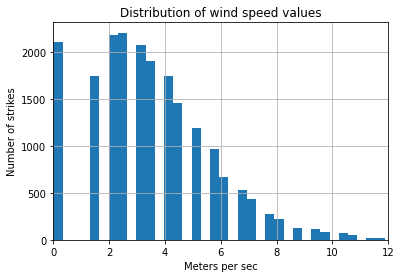

In [123]:
# посмотрим на распределение значений
final_data.query('wind_speed != 999.9').wind_speed.hist(bins=50)
plt.title('Distribution of wind speed values')
plt.xlabel('Meters per sec')
plt.ylabel('Number of strikes')
plt.xlim(0,12)
plt.show()

### Видимость, облачность и количество столкновений

In [124]:
print(final_data.query('vis_distance != 999999').vis_distance.min())
print(final_data.query('vis_distance != 999999').vis_distance.max())
print(final_data.query('vis_distance != 999999').vis_distance.median())

0
16093
16093.0


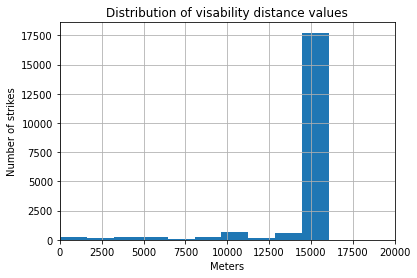

In [125]:
final_data.query('vis_distance != 999999').vis_distance.hist()
plt.title('Distribution of visability distance values')
plt.xlabel('Meters')
plt.ylabel('Number of strikes')
plt.xlim(0, 20000)
plt.show()

In [126]:
print(final_data.query('cig_distance != 99999').cig_distance.min())
print(final_data.query('cig_distance != 99999').cig_distance.max())
print(final_data.query('cig_distance != 99999').cig_distance.median())

0
22000
22000.0


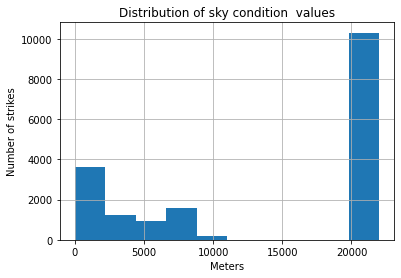

In [127]:
final_data.query('cig_distance != 99999').cig_distance.hist()
plt.title('Distribution of sky condition  values')
plt.xlabel('Meters')
plt.ylabel('Number of strikes')
plt.show()

### Атмосферное давление и количество столкновений

In [128]:
print(final_data.query('slp_hectopascals != 9999.9').slp_hectopascals.min())
print(final_data.query('slp_hectopascals != 9999.9').slp_hectopascals.max())
print(final_data.query('slp_hectopascals != 9999.9').slp_hectopascals.median())

985.2
1042.9
1015.7


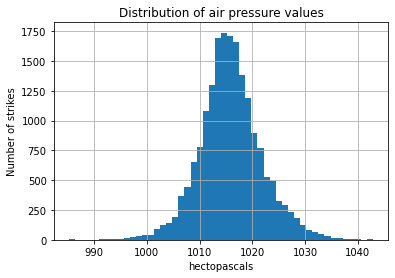

In [129]:
final_data.query('slp_hectopascals != 9999.9').slp_hectopascals.hist(bins=50)
plt.title('Distribution of air pressure values')
plt.xlabel('hectopascals')
plt.ylabel('Number of strikes')
plt.show()

Нормальное распределение, как из учебника.

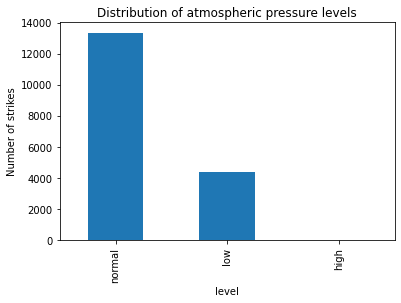

In [130]:
final_data.query('slp_hectopascals != 9999.9').slp_level.value_counts().plot.bar()
plt.title('Distribution of atmospheric pressure levels')
plt.xlabel('level')
plt.ylabel('Number of strikes')
plt.show()

Основное количество столкновений происходит при нормальном атмосферном давлении. Нет страйков при высоком атмосферном давлении.

In [131]:
weather = final_data[['incident_date', 'time_of_day', 'tmp', 'wind_direction', 'wind_type', 'wind_speed', 'vis_distance', 'cig_distance', 'cavok', 'dew_tmp', 'slp_hectopascals', 'slp_level']]
weather.sample(2)

incident_date time_of_day   tmp  wind_direction wind_type  wind_speed  \
82543    2021-09-30         NaN  15.6             320         N         4.6   
45900    2019-05-02       Night  24.4              80         N         4.1   

       vis_distance  cig_distance cavok  dew_tmp  slp_hectopascals slp_level  
82543         16093          2438     N      7.8            1017.1    normal  
45900         16093          1494     N     15.6            1016.7    normal

In [132]:
weather.wind_type.value_counts()

N    17627
C     2108
V      504
9       59
Name: wind_type, dtype: int64

### Регионы и аэропорты и количество столкновений

In [133]:
regions = final_data.groupby(
    ['faaregion', 'airport_id'],
    as_index=False
)['incident_date'].agg(['count']).sort_values(
    ['faaregion', 'count'], ascending=False).reset_index()
regions

faaregion airport_id  count
0       AWP         LAX    665
1       ASW         DFW   1808
2       ASW         IAH    665
3       ASW         AUS    655
4       ASW         DAL    638
5       ASO         MEM   1179
6       ASO         ATL   1166
7       ASO         MCO    911
8       ASO         CLT    852
9       ASO         SDF    816
10      ASO         CVG    796
11      ASO         TPA    589
12      ASO         FLL    584
13      ASO         RSW    538
14      ANM         DEN   2550
15      ANM         SLC    914
16      ANM         SEA    604
17      AGL         ORD   1458
18      AGL         DTW   1151
19      AEA         JFK   1062
20      ACE         MCI    697

In [134]:
fig = px.bar(regions, x='airport_id', y = 'count', color = 'faaregion', title='Number of strikes in airports')
fig.update_layout(yaxis={'categoryorder':'category ascending'}, 
                 xaxis_title="airport",                
                 yaxis_title="number of strikes")
fig.show()

По регионам: пиковое число страйков заификсировано в аэропорту Денвера, Northwest Mountain, далее South, Sowthwest, Great Lakes.

### Виды птиц и количество столкновений

In [135]:
total_birds = final_data.species.count()
total_birds

20298

In [136]:
final_data.species_id.str[:1].value_counts() / total_birds * 100

U    28.781161
Y    21.342004
Z    15.168982
O    10.528131
N     8.212632
K     7.744605
R     2.098729
J     1.704601
T     1.241502
I     1.123263
S     0.886787
M     0.571485
H     0.192137
F     0.118238
X     0.108385
Q     0.088679
E     0.044339
P     0.034486
L     0.009853
Name: species_id, dtype: float64

In [137]:
fig = px.bar(final_data.species_id.str[:1].value_counts(), title='Kind of birds in striks')

# Рассчитайте проценты для каждой категории
total = len(final_data)
percentages = final_data.species_id.str[:1].value_counts() / total * 100

# Обновите график с добавлением текста снаружи столбцов
fig.update_traces(text=percentages.round(1).astype(str) + '%', textposition='outside')

fig.update_layout(xaxis_title="species",                
                 yaxis_title="number of strikes", 
                 showlegend=False)

fig.show()

- U - Unknown bird (small, medium, large)
- Y - Воробьинообразные (Passerine)
- Z - perching
- O - Голубеобразные
- N - Трёхпёрсткообразные/ржанкообразные (Shorebirds)
- K - Соколообразные (Falconiformes)
- R - Owls
- J - Гусеобразные
- T - Стрижеобра́зные (Apodiformes)
- I - Аистообразные
- S - Козодоеобра́зные (Caprimulgiformes)
- M - журавлеобразные
- H - пеликанообразные
- X - дятлообразные
- F - Поганковые (Grebes)
- Q - Кукушковые
- E - Гагарообразные
- P - попугаи
- L - курообразные (Galliformes)

Посмотрим, есть ли птицы, которых сбивают преимущественно днем и преимущественно ночью. Для упрощения задачи можно выделить птиц в виды, чтобы не смотреть мелкие подвиды, поэтому рассмотрим только первые два символа кодов. 

In [138]:
birds_all = final_data.groupby([final_data.time_of_day, final_data.species_id.str[:2]])['species'].agg(['count']).reset_index()
birds_day = set(birds_all.query('time_of_day == "Day"')['species_id'])
birds_night = set(birds_all.query('time_of_day == "Night"')['species_id'])
print(list(birds_day - birds_night))
print(list(birds_night - birds_day))

['I5', 'H5', 'ZH', 'J', 'ZZ', 'N8', 'K2', 'H2', 'H4', 'N', 'M4', 'Z8', 'E1', 'K', 'P1']
['F', 'R']


__Птицы, которых сбивают днем:__ аисты, Н2 - пеликаны, H5 - американская змеешейка (Anhinga), I5 - аистовые(Storks), J - утки, гуси, лебеди (ducks, geese, swans), K - соколообразные, N8 - шилоклювковые, попугаи, журавлеобразные, гагарообразные \
__Птицы, которых сбивают ночью:__ R - совы (owls), F - Поганковые (Podicipediformes, днем кормятся, а ночью бывают очень активны в период миграций и брачного периода). 

### Географические данные аэропортов и где больше всего столкновений

In [139]:
airports_total.reset_index(inplace=True)

In [140]:
location_coordinates = final_data[['airport_id', 'latitude_x', 'longitude_x']]
location_coordinates = location_coordinates.drop_duplicates().reset_index(drop=True)
location_coordinates = location_coordinates.rename(columns={'airport_id': 'airport'})
location_coordinates = location_coordinates.merge(airports_total, how='inner', on = 'airport')
location_coordinates

airport  latitude_x  longitude_x  strikes    flights  incidents_ratio
0      DFW    32.89595    -97.03720     1808  1497870.5             0.12
1      IAH    29.98047    -95.33972      665   894263.0             0.07
2      CLT    35.21401    -80.94313      852  1142901.0             0.07
3      LAX    33.94254   -118.40807      665  1231281.5             0.05
4      JFK    40.63975    -73.77893     1062   846537.5             0.13
5      CVG    39.04614    -84.66217      796   206718.5             0.39
6      RSW    26.53617    -81.75517      538   179195.5             0.30
7      TPA    27.97547    -82.53325      589   365544.0             0.16
8      DTW    42.21206    -83.34884     1151   734573.0             0.16
9      DEN    39.85841   -104.66700     2550  1353000.0             0.19
10     ATL    33.64044    -84.42694     1166  1801603.0             0.06
11     SLC    40.78839   -111.97777      914   569458.5             0.16
12     MEM    35.04242    -89.97667     1179   112428.0             1.05
13     DAL    32.84711    -96.85177      638   301696.5             0.21
14     ORD    41.97960    -87.90446     1458  1737687.5             0.08
15     AUS    30.19453    -97.66987      655   325385.0             0.20
16     SEA    47.44898   -122.30931      604   906178.5             0.07
17     FLL    26.07258    -80.15275      584   567436.5             0.10
18     MCI    39.29761    -94.71391      697   215483.5             0.32
19     MCO    28.42889    -81.31603      911   725075.0             0.13
20     SDF    38.17439    -85.73600      816   113111.0             0.72

In [141]:
print('min', location_coordinates['incidents_ratio'].min())
print('mid', (location_coordinates['incidents_ratio'].max() + location_coordinates['incidents_ratio'].min())/2)
print('max', location_coordinates['incidents_ratio'].max())

min 0.05
mid 0.55
max 1.05


In [142]:
import folium 
from folium import Marker, Map

us_map = folium.Map(location = [37.0902, -95.7129], zoom_start = 4)

def get_color(ratio):
    if ratio < 0.38:
        return 'green'
    elif ratio < 0.71:
        return 'yellow'
    else:
        return 'red'

for loc, ratio, airport in zip(
    zip(location_coordinates['latitude_x'], location_coordinates['longitude_x']),
    location_coordinates['incidents_ratio'], location_coordinates['airport']):
    folium.CircleMarker(
        location=loc,
        radius=10 * ratio,
        color=get_color(ratio),
        fill_color=get_color(ratio),
        tooltip=airport
    ).add_to(us_map)
    
# выводим карту
us_map

Точки на карту нанесены по относительному проценту страйков от общего количества полетов. Красным и желтым маркерами отмечены проблемные локальные аэропорты Мемфиса, Луисвилля и Цинцинатти. Предположительно, в этих местах проходит основной путь миграции перелетных птиц.

##  Проверка гипотез

Формулирование гипотез: 

1) при повышении температуры увеличивается риск столкновения птиц с самолетами

2) при южном ветре возрастает риск столкновения птиц с самолетами

### Гипотеза №1

In [143]:
# сгруппируем датасет по месяцам и найдем среднемесячную температуру по регионам
avg_tmp_regions = final_data.groupby(
    ['faaregion', 'incident_year', 'incident_month']
)[['tmp']].agg(
    {'tmp': ['median', 'count']}
).droplevel(0,1).reset_index().rename(
    columns={'median': 'median_tmp',
    'count': 'strikes_cnt'})
avg_tmp_regions.head(10)

faaregion  incident_year  incident_month  median_tmp  strikes_cnt
0      ACE            2018               2        2.50            4
1      ACE            2018               3        4.15            2
2      ACE            2018               4       10.55            4
3      ACE            2018               5       18.30           19
4      ACE            2018               6       23.30           16
5      ACE            2018               7       21.70           53
6      ACE            2018               8       19.70           34
7      ACE            2018               9       20.00           35
8      ACE            2018              10       12.20           38
9      ACE            2018              11       -1.70            5

In [144]:
# Фильтрация данных для весны (например, месяцы март, апрель, май)
spring_data = avg_tmp_regions[avg_tmp_regions['incident_month'].isin([3, 4, 5])]

# Фильтрация данных для осени (например, месяцы сентябрь, октябрь, ноябрь)
autumn_data = avg_tmp_regions[avg_tmp_regions['incident_month'].isin([9, 10, 11])]

# Вычисление корреляции для весны
spring_corr, _ = stats.pearsonr(spring_data['median_tmp'], spring_data['strikes_cnt'])
print("Корреляция весной:", spring_corr)

# Вычисление корреляции для осени
autumn_corr, _ = stats.pearsonr(autumn_data['median_tmp'], autumn_data['strikes_cnt'])
print("Корреляция осенью:", autumn_corr)


Корреляция весной: 0.47717030165414853
Корреляция осенью: 0.4349129331424598


Значение коэффициента корреляции Пирсона находится в диапазоне от -1 до 1. Чем ближе значение к 1, тем сильнее положительная корреляция. В моем случае, оба значения корреляции положительны, и близки к 0.5, что указывает на умеренную положительную связь между температурой и количеством столкновений.

Это означает, что при повышении температуры риск столкновения птиц с самолетами увеличивается как весной, так и осенью, но связь не является очень сильной.

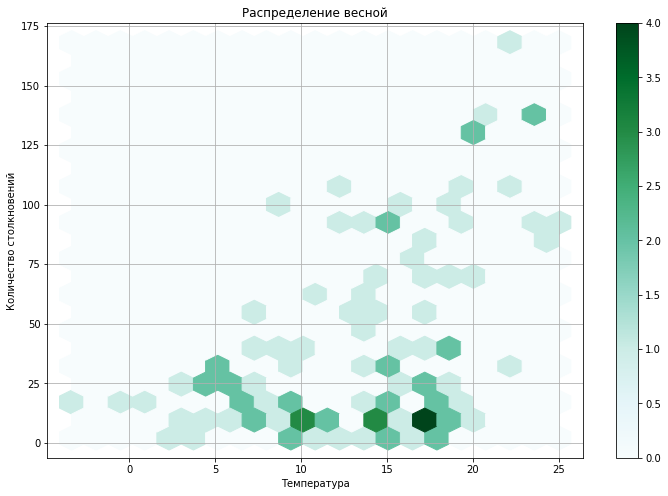

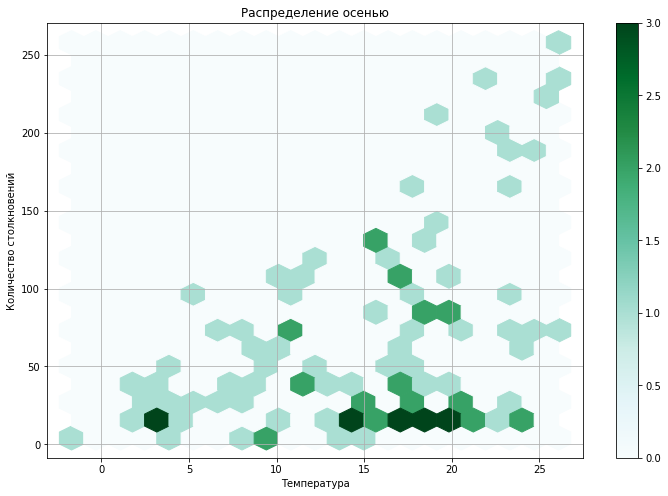

In [145]:
# График для весны
fig, ax = plt.subplots(figsize=(12, 8))

spring_data.plot(x='median_tmp', y='strikes_cnt', kind='hexbin', gridsize=20, sharex=False, grid=True, ax=ax)
plt.title('Распределение весной')
plt.xlabel('Температура')
plt.ylabel('Количество столкновений')
plt.show()

# График для осени
fig, ax = plt.subplots(figsize=(12, 8))

autumn_data.plot(x='median_tmp', y='strikes_cnt', kind='hexbin', gridsize=20, sharex=False, grid=True, ax=ax)
plt.title('Распределение осенью')
plt.xlabel('Температура')
plt.ylabel('Количество столкновений')
plt.show()

### Гипотеза №2

При южном ветре возрастает риск столкновения птиц с самолетами

In [146]:
wnd_direction = final_data.groupby(
    ['rumbs', 'incident_year', 'incident_month']
)['incident_date'].agg(['count']).reset_index()
wnd_direction.head(10)

rumbs  incident_year  incident_month  count
0                 2018               1     14
1                 2018               2     19
2                 2018               3     20
3                 2018               4     31
4                 2018               5     48
5                 2018               6     38
6                 2018               7     92
7                 2018               8     82
8                 2018               9     76
9                 2018              10     57

In [147]:
spring_months = [3, 4, 5]
autumn_months = [9, 10, 11]

# Создание столбца с сезоном
wnd_direction['season'] = 'Unknown'
wnd_direction.loc[wnd_direction['incident_month'].isin(spring_months), 'season'] = 'Spring'
wnd_direction.loc[wnd_direction['incident_month'].isin(autumn_months), 'season'] = 'Autumn'


# Направления ветра весной и количество страйков
spring_wind = wnd_direction[wnd_direction['season'] == 'Spring']

# Направления ветра осенью и количество страйков
autumn_wind = wnd_direction[wnd_direction['season'] == 'Autumn']

In [148]:
spring = spring_wind.query(
    'rumbs != ""'
).pivot_table(
    index='rumbs', values='count', aggfunc='sum'
).reset_index().sort_values(by='count',ascending=False)
spring

rumbs  count
4     S    940
5    SE    497
1     N    453
0     E    449
6    SW    446
7     W    383
3    NW    319
2    NE    302

In [149]:
autumn = autumn_wind.query(
    'rumbs != ""'
).pivot_table(
    index='rumbs', values='count', aggfunc='sum'
).reset_index().sort_values(by='count',ascending=False)
autumn

rumbs  count
1     N   1053
4     S    821
6    SW    711
3    NW    696
2    NE    679
0     E    607
7     W    598
5    SE    489

## Выводы:

В ходе исследования удалось выявить следующее:

   В столкновениях птиц с самолетами заметна явная сезонность, что может подтверждаться сезонами миграции, которые обычно приходятся на весну и осень. Весной пик риска столкновений приходится на дни с теплой температурой и южными ветрами. Осенью пик столкновения приходится на прохладные дни с преобладающими северными ветрами. Исходя из этого, можно предположить, что благоприятные ветры (попутные) стимулируют миграцию для перелетных птиц и соотвественно, повышают риск столкновений. При этом, кажется, что ветер влияет несколько сильнее, чем температура, хотя влияние температуры, хоть и не подтвердилось на 100%, нельзя отбрасывать.
    
   Также в ходе анализа выяснилось то, что в 2020 году в целом заметно снижение количества столкновений, что связано с пандемией коронавируса. Тогда было сильно сокращено количество международных рейсов. Также в ходе знакомства с данными по числу страйков в абсолютных числах лидерами стали аэропорты Денвера и Атланты. Однако при более детальном погружении в данные оказалось, что в относительных величинах столкновения с птицами преобладают, наоборот, в локальных небольших аэропортах. В частности, выделяется аэропорт Мемфиса.  
    
   Анализ времени суток и числа страйков не показал особых различий между количеством страйков днем или ночью. И там, и там заметна сезонность. Те же самые пики в период миграций перелетных птиц. Кроме того, удалось найти птиц, которых сбивают преимущественно по ночам. Видимо, это связано с циркадными ритмами определенных видов птиц, которые активны ночью (совы и поганковые). 
    
   Также в ходе анализа удалось определить, что самолеты сбивают птиц преимущественно на низкой высоте - обыкновенно страйки случаются в фазе набора высоты и снижения (до 300 метров), при нормальном давлении.